In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import warnings
import matplotlib.transforms as transforms

warnings.filterwarnings('ignore')

## sims = different simSEED and sampleSEED, everything else same

In [2]:
DRW_filenames = glob.glob('json_files/varsimSEED_varsampleSEED/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('json_files/varsimSEED_varsampleSEED/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('json_files/varsimSEED_varsampleSEED/*CARMA21.*')
CARMA21_filenames.sort()

In [3]:
simDATA = pd.read_csv('simDATAcsvs/simDATA_varsimSEED_varsampleSEED.csv')

In [4]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean' ]] = 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,NumofWINDOW,OBSperiod,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean
0,1000.0,59363.0,23136.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
1,1001.0,1765.0,42701.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
2,1002.0,25578.0,22607.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
3,1003.0,99968.0,3820.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
4,1004.0,56490.0,23992.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10995.0,9648.0,72644.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
9996,10996.0,41689.0,10238.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
9997,10997.0,23031.0,13470.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0
9998,10998.0,81384.0,2527.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0


In [5]:
for i,name in enumerate(DRW_filenames):
    ID = int(DRW_filenames[i][-13:-9])
    
    with open(DRW_filenames[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    
    print(i, end='-->')

In [6]:
simDATA_cropped = simDATA.iloc[0:1036]

In [7]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,NumofWINDOW,OBSperiod,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,bestMODEL
0,1000.0,59363.0,23136.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
1,1001.0,1765.0,42701.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
2,1002.0,25578.0,22607.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
3,1003.0,99968.0,3820.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
4,1004.0,56490.0,23992.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2031.0,63150.0,86571.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
1032,2032.0,31310.0,30513.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
1033,2033.0,75089.0,87146.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None
1034,2034.0,87328.0,54100.0,0.15,0.015,0.00274,-1.0,-2.5,10.0,20,8,6,60,0.2,0,0,0,None


In [8]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21']
    best_model_arg = np.argmax(np.array(simDATA_cropped.iloc[i][['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean']]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [9]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
DRW    1036
Name: count, dtype: int64

## sims : low alpha = -1, high alpha = [-2, -4]

#### processing

In [10]:
DRW_filenames = glob.glob('json_files/highALPHA_2_4/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('json_files/highALPHA_2_4/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('json_files/highALPHA_2_4/*CARMA21.*')
CARMA21_filenames.sort()

In [11]:
simDATA = pd.read_csv('simDATAcsvs/simDATA_highALPHA_2_4.csv')

In [12]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'DRW_bf', 'DRWsine_bf' ]] = 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,257.106911,263.327143,257.707200,3.209004,3.458813
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,241.216390,244.006904,239.830303,1.226910,1.228402
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,237.325606,241.976375,236.975134,2.468755,3.233171
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,228.696471,232.270351,229.493535,0.748757,1.490110
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,236.097524,237.415347,235.198890,0.621555,0.864373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
for i,name in enumerate(DRW_filenames):
    ID = int(DRW_filenames[i][-13:-9])
    
    with open(DRW_filenames[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'CARMA_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.median(DRW_dict['scales'])
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.median(DRWsine_dict['scales'])
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    
    print(i, end='-->')

In [14]:
simDATA.to_csv('simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [15]:
simDATA_cropped = simDATA.iloc[0:len(DRW_filenames)]

In [16]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf,bestMODEL


In [17]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21']
    best_model_arg = np.argmax(np.array(simDATA_cropped.iloc[i][['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean']]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

In [18]:
simDATA_cropped.bestMODEL.value_counts()

Series([], Name: count, dtype: int64)

In [19]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,257.106911,263.327143,257.707200,3.209004,3.458813
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,241.216390,244.006904,239.830303,1.226910,1.228402
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,237.325606,241.976375,236.975134,2.468755,3.233171
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,228.696471,232.270351,229.493535,0.748757,1.490110
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,236.097524,237.415347,235.198890,0.621555,0.864373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
simDATA_cropped['DRW_CARMA21_diff'] = simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean
simDATA_cropped['DRWsine_CARMA21_diff'] = simDATA_cropped.DRWsine_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean

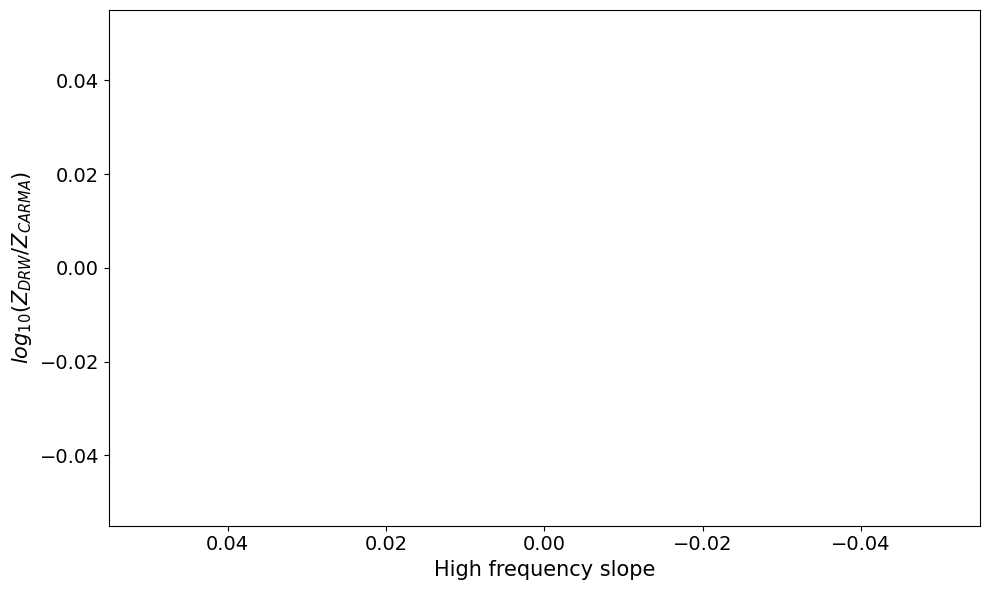

In [21]:

plt.figure(figsize=[10,6])
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRW_CARMA21_diff),'.')
plt.xlabel('High frequency slope', fontsize=15)
plt.ylabel('$log_{10}(Z_{DRW}/Z_{CARMA})$', fontsize=15)
plt.gca().invert_xaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

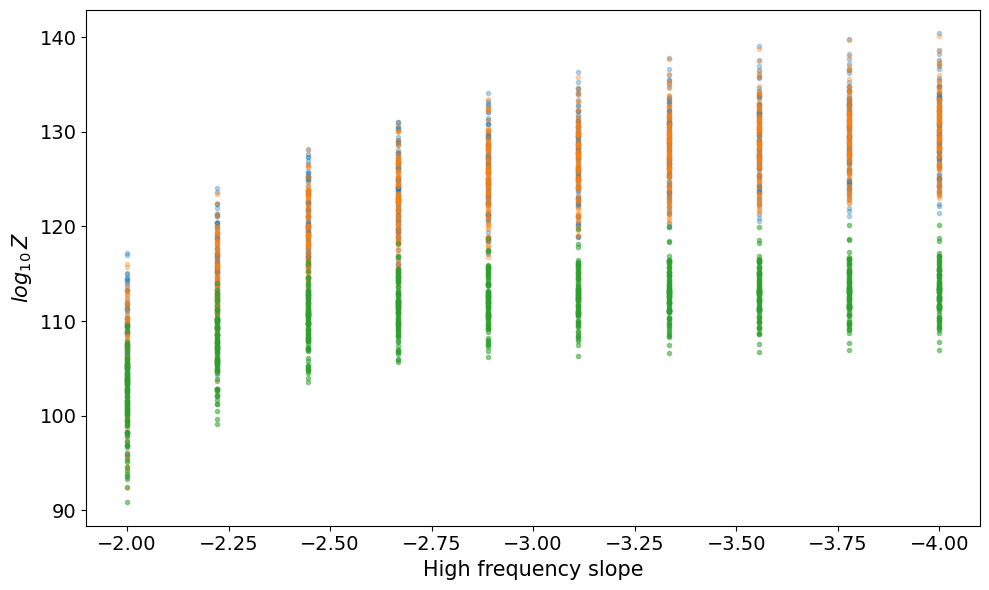

In [14]:
plt.figure(figsize=[10,6])
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRW_log_Z_mean),'.', alpha=0.3)
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRWsine_log_Z_mean),'.', alpha=0.3)
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.CARMA21_log_Z_mean),'.', alpha=0.5)
plt.xlabel('High frequency slope', fontsize=15)
plt.ylabel('$log_{10}\,Z}$', fontsize=15)
plt.gca().invert_xaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

#### plots

In [14]:
bestMODELcounts = simDATA_cropped.groupby('highalpha')[['bestMODEL']].value_counts()
BMCdict = bestMODELcounts.to_dict()

highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict:
    
    if key[1]=='DRW':
        highalpha_array.append(key[0])
        DRW_value_counts.append(BMCdict[key])
    if key[1]=='DRWsine':
        DRWsine_value_counts.append(BMCdict[key])

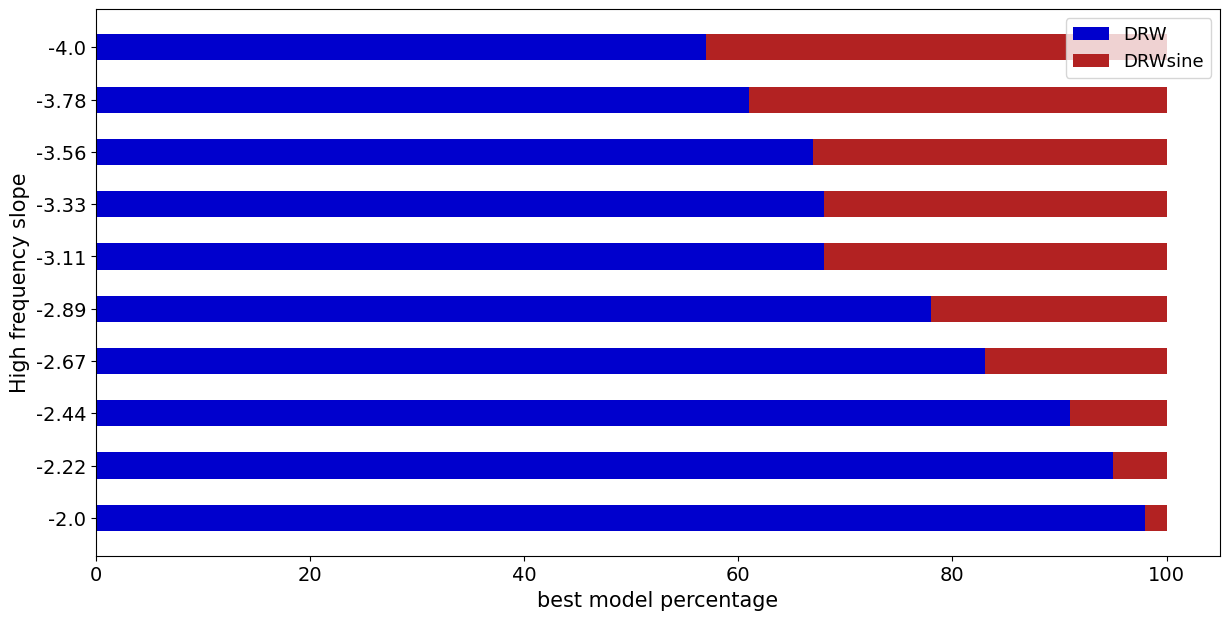

In [44]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13)
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

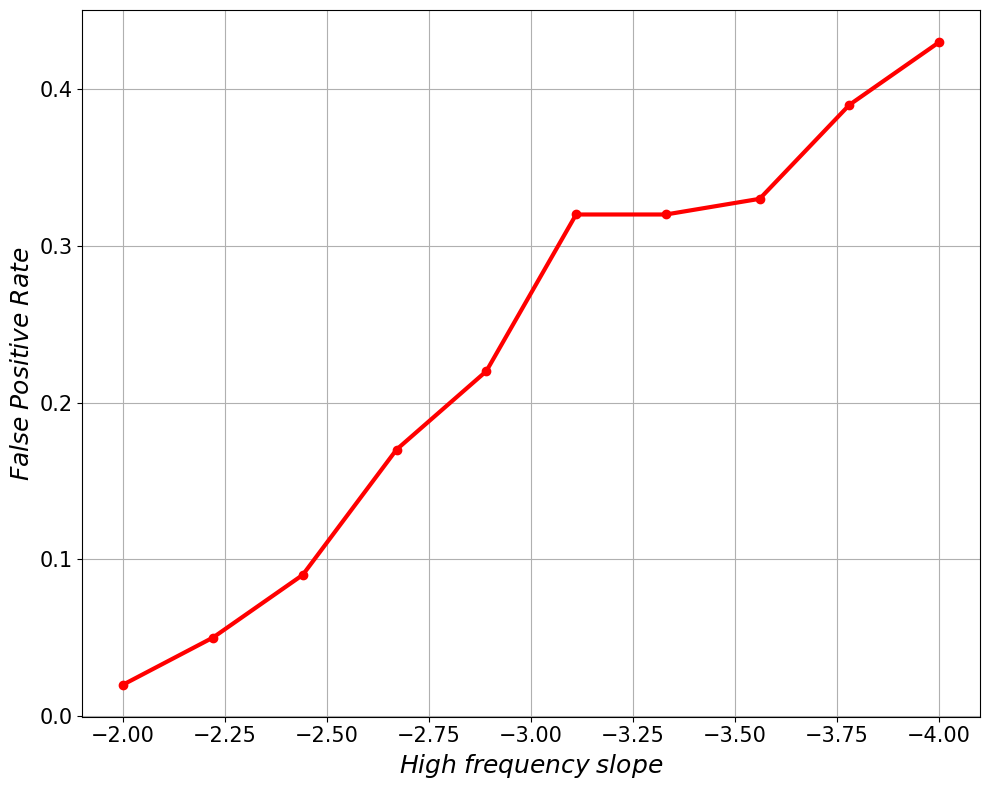

In [43]:
plt.figure(figsize=[10,8])
plt.plot(np.round(highalpha_array,decimals=2), np.array(DRWsine_value_counts)/100, 'ro-', lw=3 )
plt.gca().invert_xaxis()
plt.grid()
plt.tick_params(labelsize=15)
plt.xlabel(r'$High\;frequency\;slope$', fontsize=18)
plt.ylabel(r'$False\;Positive\;Rate$', fontsize=18)
plt.tight_layout()
plt.savefig('PhDpresentation/FPR.png')
plt.show()


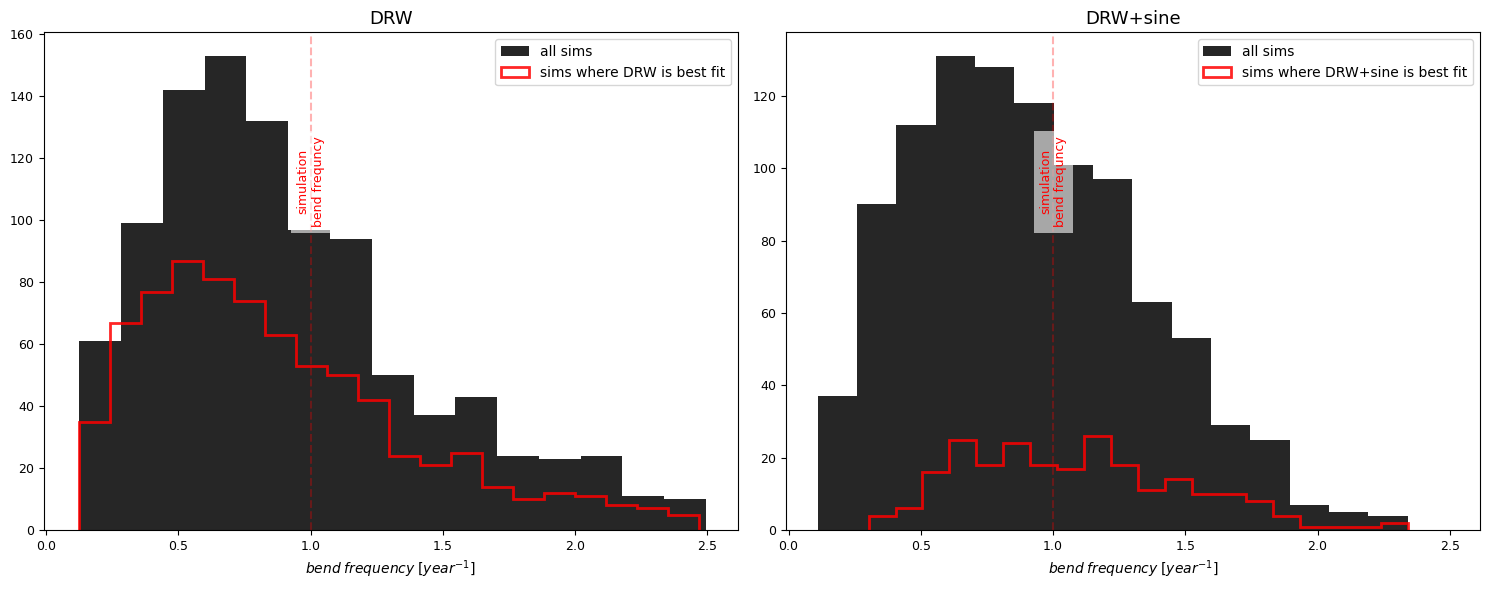

In [29]:
def plot_vertical_line(ax, x_position, text, c='red', ypos = 0.2, boxalpha = 1, textalpha=0.3):
        ax.axvline(x=x_position, color=c, linestyle='--', alpha=0.3, zorder=1)
        
        trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
        
        ax.text(x_position, ypos, text, color=c, fontsize=9, bbox = dict(facecolor = 'white',edgecolor = 'none', alpha =boxalpha),
                ha='center', va='center', transform=trans, rotation = 90, alpha=textalpha, zorder=7)
        
fig, ax = plt.subplots(1,2, figsize=[15, 6], sharex=True)
#plt.plot( simDATA[0:101].DRW_bf*365 , np.ones(len(simDATA[0:101].DRW_bf)), 'k.', label='')
ax[0].hist( simDATA_cropped.DRW_bf, bins=15, histtype='bar', label='all sims',  alpha=0.85, color='k')
ax[0].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRW'].DRW_bf, bins=20, histtype='step', lw=2, label='sims where DRW is best fit',  alpha=0.85, color='r')
ax[0].legend()

ax[1].hist( simDATA_cropped.DRWsine_bf, bins=15, histtype='bar', label='all sims', alpha=0.85, color='k')
ax[1].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRWsine'].DRWsine_bf, bins=20, histtype='step', lw=2, label='sims where DRW+sine is best fit', alpha=0.85, color='r')
ax[1].legend()


titles = ['DRW','DRW+sine']

for i in range(2):
    plot_vertical_line(ax[i], 1 , 'simulation\nbend frequncy', ypos=0.7, textalpha=1, boxalpha=0.6)
    #ax[i][j].axvline(1, color='r')
    if i!=2:
        ax[i].set_xlabel(r'$bend\;frequency\;[year^{-1}]$', fontsize=10)
    else:
        ax[i].set_xlabel(r'$frequency\;[year^{-1}]$', fontsize=10)
    ax[i].tick_params(labelsize=9)
    ax[i].set_title(titles[i],fontsize=13)
    #ax[i][j].legend()
    
plt.tight_layout()
#plt.suptitle('Bend frequency reproduction', fontsize=19, )
plt.savefig('plots/bendFreq_highalpha2_4.png')
plt.show()


In [27]:
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,bestMODEL,DRW_CARMA21_diff,DRWsine_CARMA21_diff
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,265.014133,262.151778,252.024996,0.230852,0.258464,DRW,12.989138,10.126783
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,246.142154,246.269348,236.585116,0.427150,0.483724,DRWsine,9.557037,9.684232
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,245.073218,241.133433,236.239642,0.236016,0.333309,DRW,8.833576,4.893791
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,234.983904,232.202708,226.239527,0.538138,0.847246,DRW,8.744377,5.963182
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,241.973272,238.771251,230.567598,0.743234,0.700210,DRW,11.405674,8.203652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.304722,305.266565,259.421915,1.588990,1.289438,DRW,50.882807,45.844650
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,319.247525,319.066786,267.046023,2.310239,1.920909,DRW,52.201502,52.020764
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.460404,309.283892,269.175288,0.675306,0.805813,DRW,41.285115,40.108604
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,301.480146,299.797354,262.051046,1.827159,1.797846,DRW,39.429101,37.746308


## sims : low alpha = -1, high alpha = [-2, -4] all models

#### processing

In [22]:
DRW_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results/json_files/highALPHA_2_4/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [23]:
DRW_filenames[-1], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

IndexError: list index out of range

In [238]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[46:50]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[46:50]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[46:50]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[46:50]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[46:50]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[46:50]))


In [239]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [240]:
len(common_IDs)

938

In [241]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results/json_files/highALPHA_2_4/'+str(id)+'_OBPLsine10.json')

In [242]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv')

In [243]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0


In [244]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][46:50])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [65]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [245]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [246]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,254.447924,262.188263,0.729888,0.632849,257.106911,263.327143,257.707200,3.209004,3.458813,None
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,239.611387,244.848654,0.879090,0.595549,241.216390,244.006904,239.830303,1.226910,1.228402,None
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,235.028685,241.578204,0.825935,0.654739,237.325606,241.976375,236.975134,2.468755,3.233171,None
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,227.954219,231.462609,0.837170,0.702374,228.696471,232.270351,229.493535,0.748757,1.490110,None
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,235.551097,238.866394,0.701450,0.569038,236.097524,237.415347,235.198890,0.621555,0.864373,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1994.0,99714.0,82533.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,275.162760,292.069839,0.355487,0.328344,290.289288,293.572013,289.629075,0.806788,0.871583,None
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,285.376859,310.957780,0.313137,0.319528,306.011849,310.982775,307.237000,0.549489,0.879908,None
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,298.281296,324.876266,0.307590,0.308691,319.878248,321.105277,318.607829,0.714891,0.681354,None
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,293.623739,308.305739,0.319221,0.324908,304.099997,310.554138,305.746207,1.197162,1.639950,None


In [247]:
np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean']])

array([298.859572954526, 301.35952510850944, 310.4063636906754],
      dtype=object)

In [248]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->29-->30-->31-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->46-->47-->48-->49-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->94-->95-->96-->97-->98-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->129-->130-->131-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->146-->147-->148-->149-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->185-->186-->187-->188-->189-->190-->191-->192-->194-->

In [249]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         714
CARMA21        211
DRW             11
CARMA21sine      2
Name: count, dtype: int64

In [250]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,258.994403,254.447924,262.188263,0.729888,0.632849,257.106911,263.327143,257.707200,3.209004,3.458813
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,242.085262,239.611387,244.848654,0.879090,0.595549,241.216390,244.006904,239.830303,1.226910,1.228402
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,239.446681,235.028685,241.578204,0.825935,0.654739,237.325606,241.976375,236.975134,2.468755,3.233171
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,231.496190,227.954219,231.462609,0.837170,0.702374,228.696471,232.270351,229.493535,0.748757,1.490110
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,238.975529,235.551097,238.866394,0.701450,0.569038,236.097524,237.415347,235.198890,0.621555,0.864373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,290.713438,285.376859,310.957780,0.313137,0.319528,306.011849,310.982775,307.237000,0.549489,0.879908
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,303.452791,298.281296,324.876266,0.307590,0.308691,319.878248,321.105277,318.607829,0.714891,0.681354
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,299.753807,293.623739,308.305739,0.319221,0.324908,304.099997,310.554138,305.746207,1.197162,1.639950
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,294.418624,290.620267,310.406364,0.323807,0.318787,307.142828,308.680514,306.779563,0.574845,0.725977


In [251]:
simDATA_cropped['DRW_CARMA21_diff'] = simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean
simDATA_cropped['DRWsine_CARMA21_diff'] = simDATA_cropped.DRWsine_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean

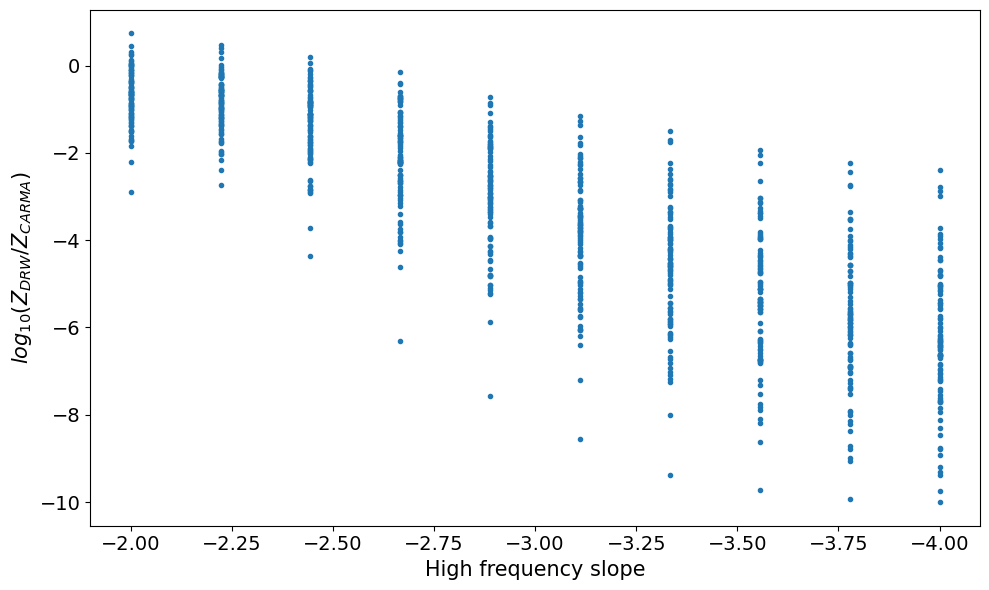

In [252]:

plt.figure(figsize=[10,6])
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRW_CARMA21_diff),'.')
plt.xlabel('High frequency slope', fontsize=15)
plt.ylabel('$log_{10}(Z_{DRW}/Z_{CARMA})$', fontsize=15)
plt.gca().invert_xaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

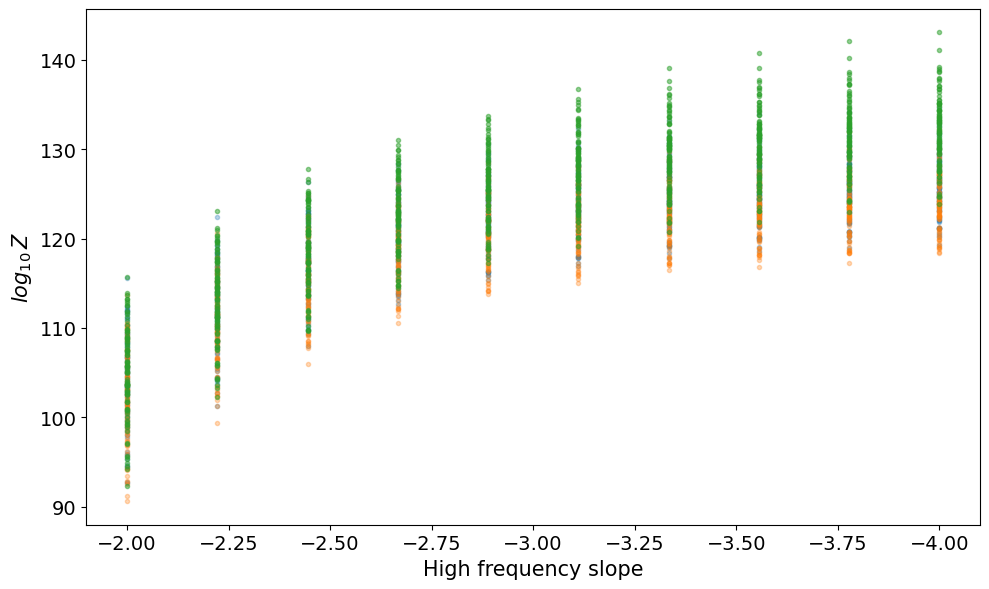

In [253]:
plt.figure(figsize=[10,6])
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRW_log_Z_mean),'.', alpha=0.3)
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.DRWsine_log_Z_mean),'.', alpha=0.3)
plt.plot(simDATA_cropped.highalpha, np.log10(np.e**simDATA_cropped.CARMA21_log_Z_mean),'.', alpha=0.5)
plt.xlabel('High frequency slope', fontsize=15)
plt.ylabel('$log_{10}\,Z}$', fontsize=15)
plt.gca().invert_xaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

In [254]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = -1, -1,-1

In [255]:
simDATA_cropped['DRWsine_bool'] = np.array(simDATA_cropped['DRW_log_Z_mean']<simDATA_cropped['DRWsine_log_Z_mean']).astype('int')
simDATA_cropped['CARMA21sine_bool'] = np.array(simDATA_cropped['CARMA21_log_Z_mean']<simDATA_cropped['CARMA21sine_log_Z_mean']).astype('int')
simDATA_cropped['OBPLsine_bool'] = np.array(simDATA_cropped['OBPL10_log_Z_mean']<simDATA_cropped['OBPLsine10_log_Z_mean']).astype('int')

#### plots

In [256]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0

    return BMCdict

BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])


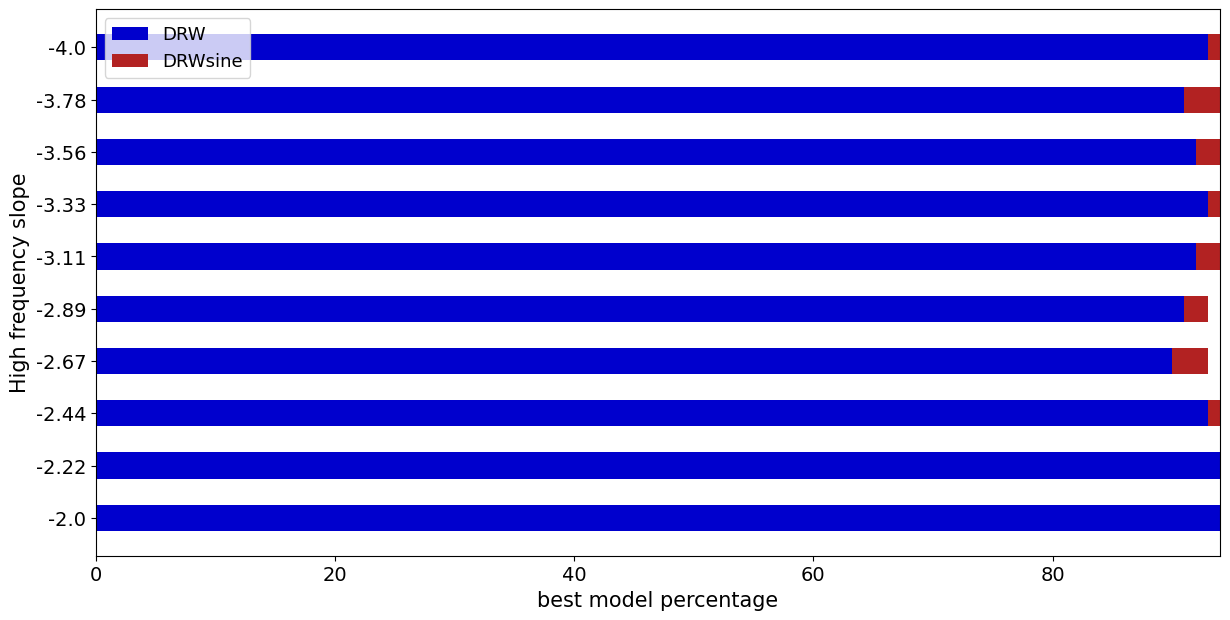

In [257]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

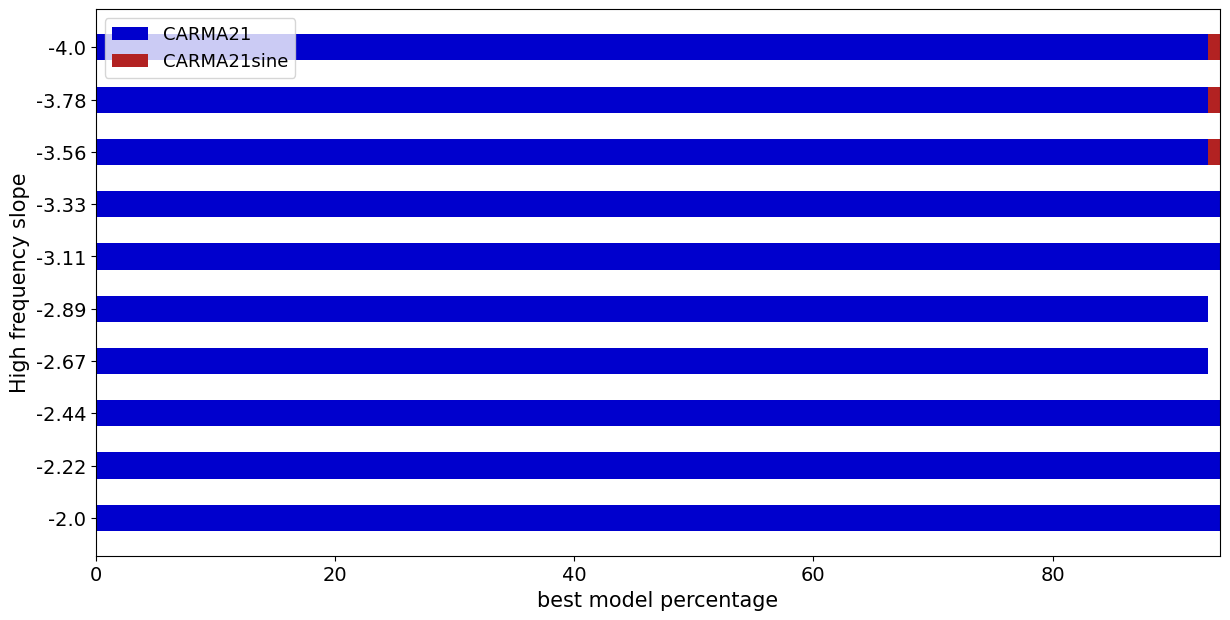

In [258]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

highalpha_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        CARMA21_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['CARMA21', 'CARMA21sine'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

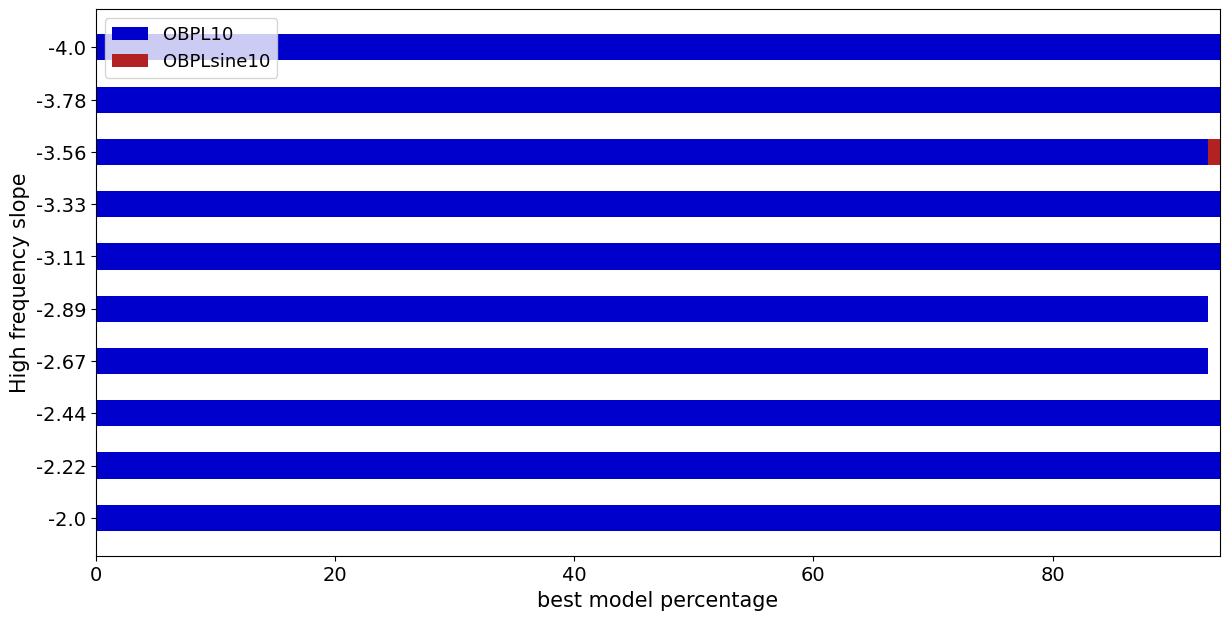

In [259]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

highalpha_array = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        OBPL10_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine10_value_counts.append(BMCdict_OBPL10[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine10_value_counts, left=OBPL10_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['OBPL10', 'OBPLsine10'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

In [260]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [261]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('highalpha')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [262]:
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        highalpha_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])

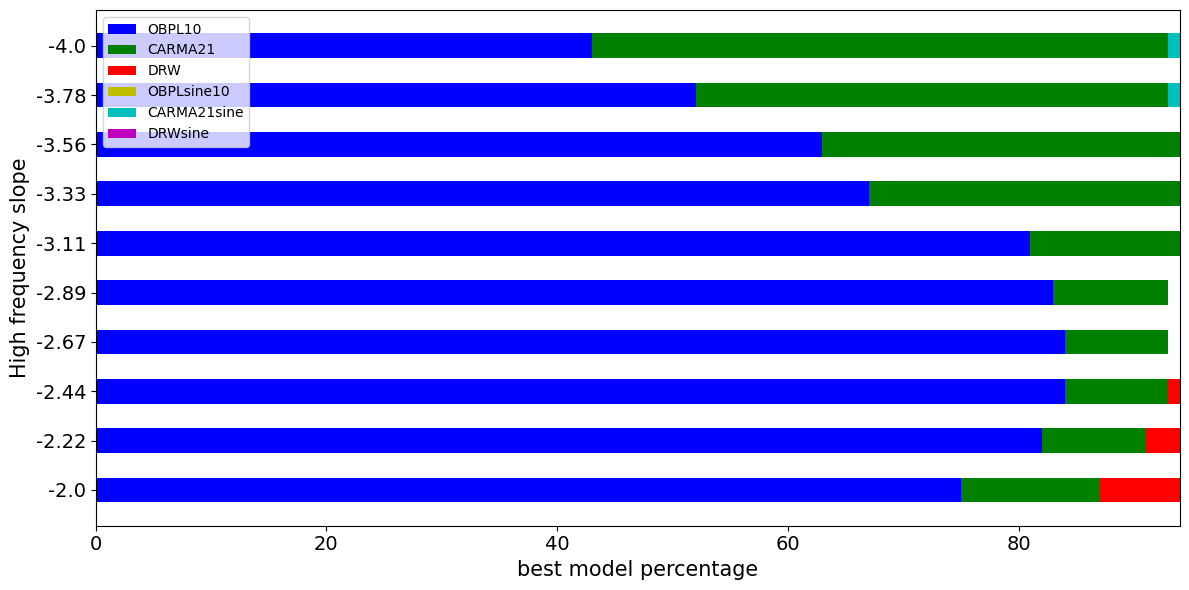

In [263]:


plt.figure(figsize=[12, 6])

plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='b')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='c')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()




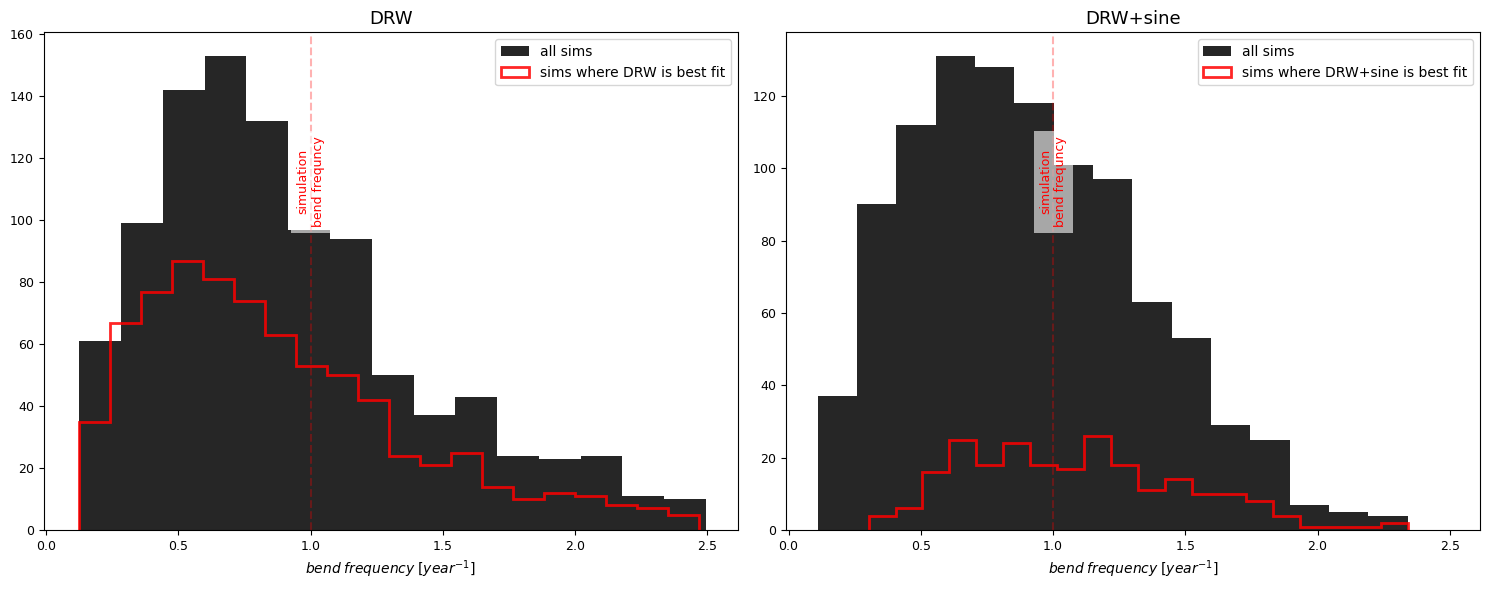

In [ ]:
def plot_vertical_line(ax, x_position, text, c='red', ypos = 0.2, boxalpha = 1, textalpha=0.3):
        ax.axvline(x=x_position, color=c, linestyle='--', alpha=0.3, zorder=1)
        
        trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
        
        ax.text(x_position, ypos, text, color=c, fontsize=9, bbox = dict(facecolor = 'white',edgecolor = 'none', alpha =boxalpha),
                ha='center', va='center', transform=trans, rotation = 90, alpha=textalpha, zorder=7)
        
fig, ax = plt.subplots(1,2, figsize=[15, 6], sharex=True)
#plt.plot( simDATA[0:101].DRW_bf*365 , np.ones(len(simDATA[0:101].DRW_bf)), 'k.', label='')
ax[0].hist( simDATA_cropped.DRW_bf, bins=15, histtype='bar', label='all sims',  alpha=0.85, color='k')
ax[0].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRW'].DRW_bf, bins=20, histtype='step', lw=2, label='sims where DRW is best fit',  alpha=0.85, color='r')
ax[0].legend()

ax[1].hist( simDATA_cropped.DRWsine_bf, bins=15, histtype='bar', label='all sims', alpha=0.85, color='k')
ax[1].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRWsine'].DRWsine_bf, bins=20, histtype='step', lw=2, label='sims where DRW+sine is best fit', alpha=0.85, color='r')
ax[1].legend()


titles = ['DRW','DRW+sine']

for i in range(2):
    plot_vertical_line(ax[i], 1 , 'simulation\nbend frequncy', ypos=0.7, textalpha=1, boxalpha=0.6)
    #ax[i][j].axvline(1, color='r')
    if i!=2:
        ax[i].set_xlabel(r'$bend\;frequency\;[year^{-1}]$', fontsize=10)
    else:
        ax[i].set_xlabel(r'$frequency\;[year^{-1}]$', fontsize=10)
    ax[i].tick_params(labelsize=9)
    ax[i].set_title(titles[i],fontsize=13)
    #ax[i][j].legend()
    
plt.tight_layout()
#plt.suptitle('Bend frequency reproduction', fontsize=19, )
plt.savefig('plots/bendFreq_highalpha2_4.png')
plt.show()


In [ ]:
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,bestMODEL,DRW_CARMA21_diff,DRWsine_CARMA21_diff
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,265.014133,262.151778,252.024996,0.230852,0.258464,DRW,12.989138,10.126783
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,246.142154,246.269348,236.585116,0.427150,0.483724,DRWsine,9.557037,9.684232
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,245.073218,241.133433,236.239642,0.236016,0.333309,DRW,8.833576,4.893791
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,234.983904,232.202708,226.239527,0.538138,0.847246,DRW,8.744377,5.963182
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,241.973272,238.771251,230.567598,0.743234,0.700210,DRW,11.405674,8.203652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.304722,305.266565,259.421915,1.588990,1.289438,DRW,50.882807,45.844650
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,319.247525,319.066786,267.046023,2.310239,1.920909,DRW,52.201502,52.020764
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.460404,309.283892,269.175288,0.675306,0.805813,DRW,41.285115,40.108604
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,301.480146,299.797354,262.051046,1.827159,1.797846,DRW,39.429101,37.746308


## sims : low alpha = -1, high alpha = [-2, -4] all models broad prior

#### Processing

In [126]:
DRW_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_broadprior/json_files/highALPHA_2_4/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [130]:
DRW_filenames[-1][57:61], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('1998',
 'helios_files/results_broadprior/json_files/highALPHA_2_4/1998_DRWsine.json',
 'helios_files/results_broadprior/json_files/highALPHA_2_4/1998_CARMA21.json',
 'helios_files/results_broadprior/json_files/highALPHA_2_4/1998_CARMA21sine.json',
 'helios_files/results_broadprior/json_files/highALPHA_2_4/1998_OBPL10.json',
 'helios_files/results_broadprior/json_files/highALPHA_2_4/1998_OBPLsine10.json')

In [131]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[57:61]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[57:61]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[57:61]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[57:61]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[57:61]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[57:61]))


In [132]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [133]:
len(common_IDs)

940

In [134]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_broadprior/json_files/highALPHA_2_4/'+str(id)+'_OBPLsine10.json')

In [135]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv')

In [136]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0


In [138]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][57:61])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [ ]:
simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [139]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [140]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,257.026322,262.188263,5.431253,4.643333,257.106911,263.327143,257.707200,3.209004,3.458813,None
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,239.816841,244.848654,2.460345,1.765045,241.216390,244.006904,239.830303,1.226910,1.228402,None
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,237.216061,241.578204,5.026959,4.510561,237.325606,241.976375,236.975134,2.468755,3.233171,None
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,228.917422,231.462609,1.996797,2.575720,228.696471,232.270351,229.493535,0.748757,1.490110,None
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,235.870898,238.866394,1.333681,1.720608,236.097524,237.415347,235.198890,0.621555,0.864373,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1994.0,99714.0,82533.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,278.341345,292.069839,0.999280,0.703805,290.289288,293.572013,289.629075,0.806788,0.871583,None
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,304.273397,310.957780,0.780979,1.417954,306.011849,310.982775,307.237000,0.549489,0.879908,None
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,314.900837,324.876266,0.552008,0.584058,319.878248,321.105277,318.607829,0.714891,0.681354,None
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,304.164267,308.305739,1.793268,1.185484,304.099997,310.554138,305.746207,1.197162,1.639950,None


In [141]:
np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean']])

array([294.41862402231754, 290.6202666784651, 310.4063636906754],
      dtype=object)

In [142]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->29-->30-->31-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->46-->47-->48-->49-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->94-->95-->96-->97-->98-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->129-->130-->131-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->146-->147-->148-->149-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->185-->186-->187-->188-->189-->190-->191-->192-->194-->

In [143]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         702
CARMA21        197
DRW             39
CARMA21sine      2
Name: count, dtype: int64

In [144]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,262.026123,257.026322,262.188263,5.431253,4.643333,257.106911,263.327143,257.707200,3.209004,3.458813
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,242.920357,239.816841,244.848654,2.460345,1.765045,241.216390,244.006904,239.830303,1.226910,1.228402
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,242.087941,237.216061,241.578204,5.026959,4.510561,237.325606,241.976375,236.975134,2.468755,3.233171
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,231.784188,228.917422,231.462609,1.996797,2.575720,228.696471,232.270351,229.493535,0.748757,1.490110
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,239.112995,235.870898,238.866394,1.333681,1.720608,236.097524,237.415347,235.198890,0.621555,0.864373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,307.699382,304.273397,310.957780,0.780979,1.417954,306.011849,310.982775,307.237000,0.549489,0.879908
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,316.390373,314.900837,324.876266,0.552008,0.584058,319.878248,321.105277,318.607829,0.714891,0.681354
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,307.637222,304.164267,308.305739,1.793268,1.185484,304.099997,310.554138,305.746207,1.197162,1.639950
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,298.859573,301.359525,310.406364,0.634782,0.957454,307.142828,308.680514,306.779563,0.574845,0.725977


In [ ]:
simDATA_cropped['DRW_CARMA21_diff'] = simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean
simDATA_cropped['DRWsine_CARMA21_diff'] = simDATA_cropped.DRWsine_log_Z_mean - simDATA_cropped.CARMA21_log_Z_mean

In [145]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = -1, -1,-1

In [146]:
simDATA_cropped['DRWsine_bool'] = np.array(simDATA_cropped['DRW_log_Z_mean']<simDATA_cropped['DRWsine_log_Z_mean']).astype('int')
simDATA_cropped['CARMA21sine_bool'] = np.array(simDATA_cropped['CARMA21_log_Z_mean']<simDATA_cropped['CARMA21sine_log_Z_mean']).astype('int')
simDATA_cropped['OBPLsine_bool'] = np.array(simDATA_cropped['OBPL10_log_Z_mean']<simDATA_cropped['OBPLsine10_log_Z_mean']).astype('int')

#### Plots

In [206]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0

    return BMCdict

BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])


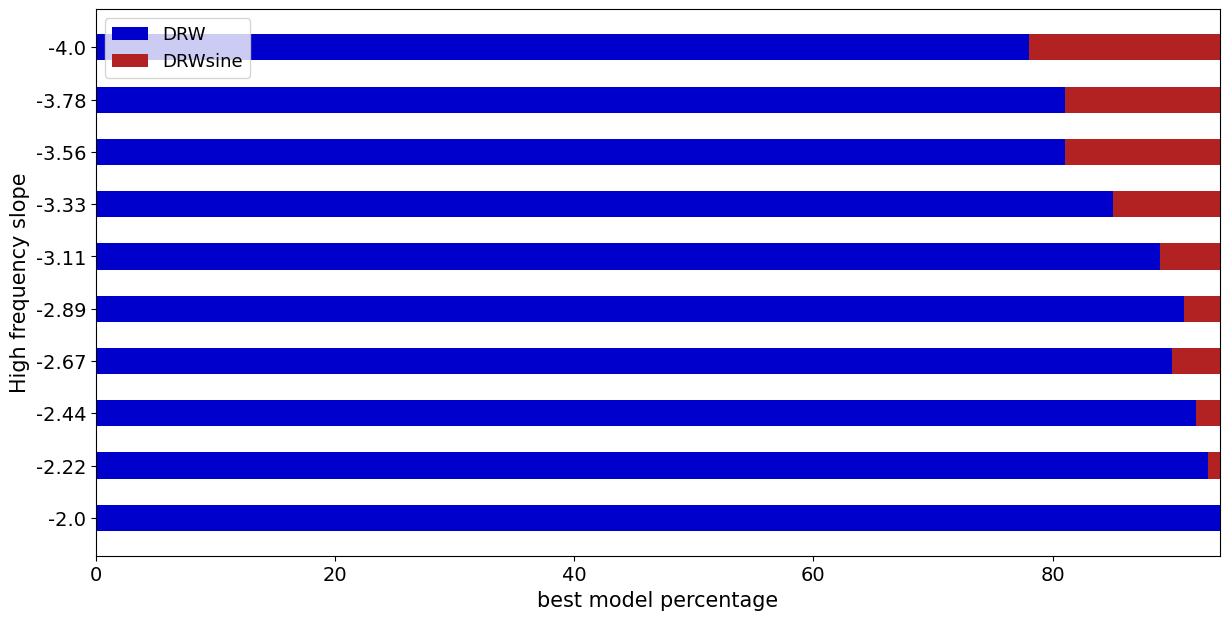

In [207]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

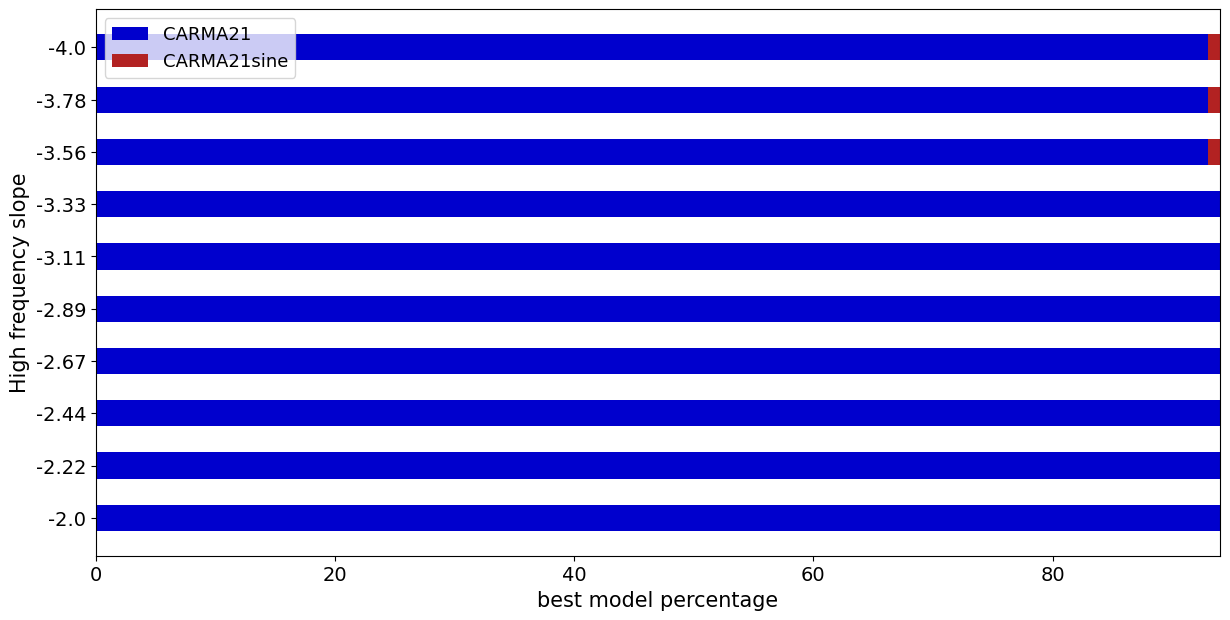

In [208]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

highalpha_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        CARMA21_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['CARMA21', 'CARMA21sine'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

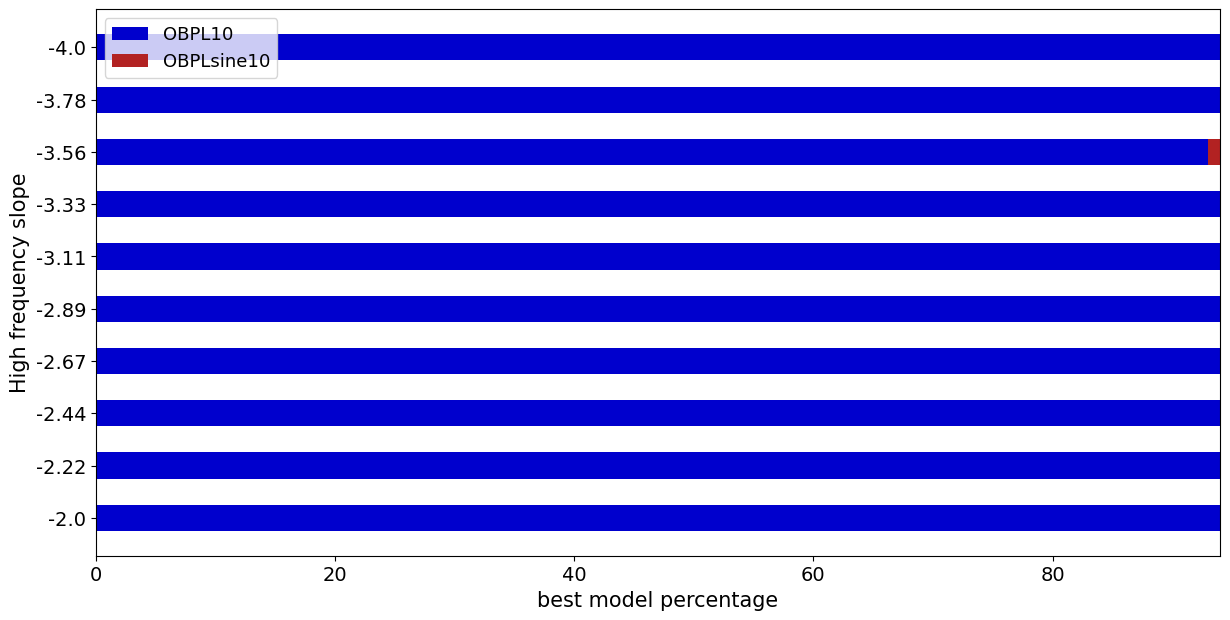

In [210]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

highalpha_array = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        OBPL10_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine10_value_counts.append(BMCdict_OBPL10[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine10_value_counts, left=OBPL10_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['OBPL10', 'OBPLsine10'], fontsize=13, loc = 'upper left')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.show()

In [211]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [216]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('highalpha')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [223]:
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        highalpha_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])

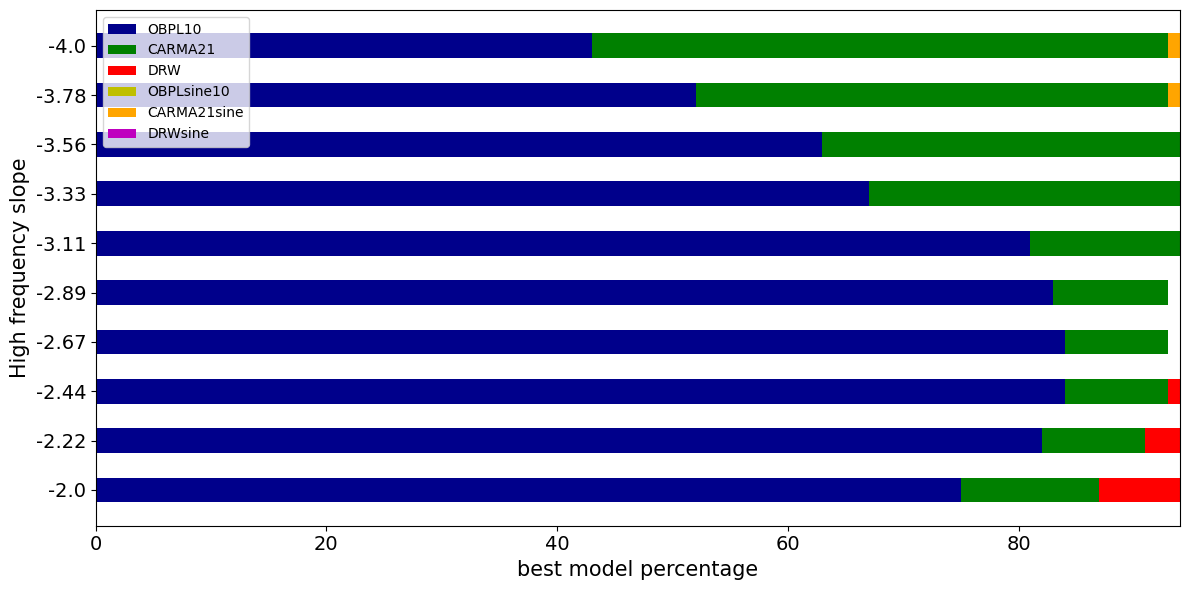

In [267]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='darkblue')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='orange')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('High frequency slope', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()




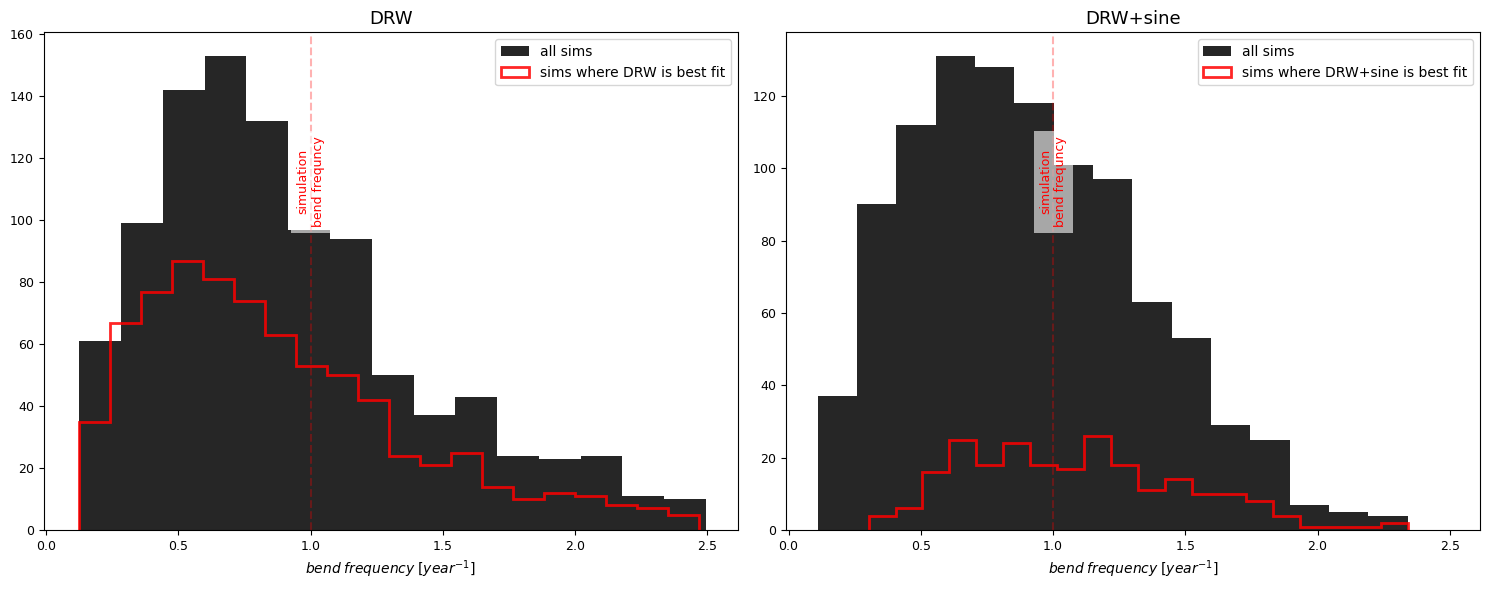

In [ ]:
def plot_vertical_line(ax, x_position, text, c='red', ypos = 0.2, boxalpha = 1, textalpha=0.3):
        ax.axvline(x=x_position, color=c, linestyle='--', alpha=0.3, zorder=1)
        
        trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
        
        ax.text(x_position, ypos, text, color=c, fontsize=9, bbox = dict(facecolor = 'white',edgecolor = 'none', alpha =boxalpha),
                ha='center', va='center', transform=trans, rotation = 90, alpha=textalpha, zorder=7)
        
fig, ax = plt.subplots(1,2, figsize=[15, 6], sharex=True)
#plt.plot( simDATA[0:101].DRW_bf*365 , np.ones(len(simDATA[0:101].DRW_bf)), 'k.', label='')
ax[0].hist( simDATA_cropped.DRW_bf, bins=15, histtype='bar', label='all sims',  alpha=0.85, color='k')
ax[0].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRW'].DRW_bf, bins=20, histtype='step', lw=2, label='sims where DRW is best fit',  alpha=0.85, color='r')
ax[0].legend()

ax[1].hist( simDATA_cropped.DRWsine_bf, bins=15, histtype='bar', label='all sims', alpha=0.85, color='k')
ax[1].hist( simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRWsine'].DRWsine_bf, bins=20, histtype='step', lw=2, label='sims where DRW+sine is best fit', alpha=0.85, color='r')
ax[1].legend()


titles = ['DRW','DRW+sine']

for i in range(2):
    plot_vertical_line(ax[i], 1 , 'simulation\nbend frequncy', ypos=0.7, textalpha=1, boxalpha=0.6)
    #ax[i][j].axvline(1, color='r')
    if i!=2:
        ax[i].set_xlabel(r'$bend\;frequency\;[year^{-1}]$', fontsize=10)
    else:
        ax[i].set_xlabel(r'$frequency\;[year^{-1}]$', fontsize=10)
    ax[i].tick_params(labelsize=9)
    ax[i].set_title(titles[i],fontsize=13)
    #ax[i][j].legend()
    
plt.tight_layout()
#plt.suptitle('Bend frequency reproduction', fontsize=19, )
plt.savefig('plots/bendFreq_highalpha2_4.png')
plt.show()


In [ ]:
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,bestMODEL,DRW_CARMA21_diff,DRWsine_CARMA21_diff
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,265.014133,262.151778,252.024996,0.230852,0.258464,DRW,12.989138,10.126783
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,246.142154,246.269348,236.585116,0.427150,0.483724,DRWsine,9.557037,9.684232
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,245.073218,241.133433,236.239642,0.236016,0.333309,DRW,8.833576,4.893791
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,234.983904,232.202708,226.239527,0.538138,0.847246,DRW,8.744377,5.963182
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,60,0.2,241.973272,238.771251,230.567598,0.743234,0.700210,DRW,11.405674,8.203652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.304722,305.266565,259.421915,1.588990,1.289438,DRW,50.882807,45.844650
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,319.247525,319.066786,267.046023,2.310239,1.920909,DRW,52.201502,52.020764
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,310.460404,309.283892,269.175288,0.675306,0.805813,DRW,41.285115,40.108604
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,60,0.2,301.480146,299.797354,262.051046,1.827159,1.797846,DRW,39.429101,37.746308


## sims : low alpha = -1, high alpha = [-2, -4] all models broader prior

#### Processing

In [222]:
DRW_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_broaderprior/json_files/highALPHA_2_4/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [223]:
DRW_filenames[-1][59:63], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('1998',
 'helios_files/results_broaderprior/json_files/highALPHA_2_4/1998_DRWsine.json',
 'helios_files/results_broaderprior/json_files/highALPHA_2_4/1998_CARMA21.json',
 'helios_files/results_broaderprior/json_files/highALPHA_2_4/1998_CARMA21sine.json',
 'helios_files/results_broaderprior/json_files/highALPHA_2_4/1998_OBPL10.json',
 'helios_files/results_broaderprior/json_files/highALPHA_2_4/1998_OBPLsine10.json')

In [224]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[59:63]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[59:63]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[59:63]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[59:63]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[59:63]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[59:63]))


In [225]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [226]:
len(common_IDs)

940

In [227]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_broaderprior/json_files/highALPHA_2_4/'+str(id)+'_OBPLsine10.json')

In [228]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv')

In [229]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0
998,1998.0,42328.0,23455.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,0,0,0,0,0,0,0,0,0,0


In [230]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][59:63])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [11]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [231]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [232]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,85077.0,21789.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,256.295145,260.408797,4.670852,4.321098,254.657782,263.988662,258.215269,4.196267,4.111134,None
1,1001.0,56812.0,96275.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,241.613536,245.519353,2.364273,1.901492,241.317932,244.705515,241.361890,1.106615,1.036840,None
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,238.526674,241.895641,5.214355,5.433458,236.882007,242.583072,237.552356,1.918411,1.884897,None
3,1003.0,66037.0,92149.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,229.914407,231.455229,2.116397,3.118016,228.386167,233.105026,230.070552,0.608829,1.190180,None
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20,...,236.857067,238.495936,1.411815,1.821721,235.702858,237.790545,235.541667,0.491762,0.697652,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1994.0,99714.0,82533.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,280.504188,294.653727,0.986163,0.671574,292.153887,295.589980,291.414982,0.755711,0.846602,None
995,1995.0,98451.0,96926.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,305.816937,312.642743,0.711852,1.401072,307.955309,312.808841,308.876390,0.521811,0.919814,None
996,1996.0,78895.0,14885.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,314.821396,325.718764,0.484092,0.549054,321.247658,321.636125,319.143464,0.737552,0.641576,None
997,1997.0,29297.0,84053.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20,...,304.445451,308.734790,1.622881,1.323163,303.352023,311.199838,306.269900,1.144970,1.548813,None


In [233]:
import corner
def plot_corner(dictionary, exclude_keys=['log_Z_mean', 'log_Z_uncert']):
    if exclude_keys is None:
        exclude_keys = []

    filtered_data = {key: value for key, value in dictionary.items() if key not in exclude_keys}

    data = np.array([array for array in filtered_data.values()]).T
    
    fig = corner.corner(data, bins=50 ,  labels=list(filtered_data.keys()), show_titles=True, title_kwargs={"fontsize": 12})
    
    plt.show()

In [234]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->29-->30-->31-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->46-->47-->48-->49-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->94-->95-->96-->97-->98-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->129-->130-->131-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->146-->147-->148-->149-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->185-->186-->187-->188-->189-->190-->191-->192-->194-->

In [235]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         683
CARMA21        185
DRW             71
CARMA21sine      1
Name: count, dtype: int64

In [236]:
simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRW']

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NightsperWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,DRW_bf,DRWsine_bf,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,OBPL10_bf,OBPLsine10_bf,bestMODEL
2,1002.0,3151.0,18152.0,0.15,0.015,0.00274,-1.0,-2.000000,10.0,20,...,238.526674,241.895641,5.214355,5.433458,236.882007,242.583072,237.552356,1.918411,1.884897,DRW
4,1004.0,88231.0,48429.0,0.15,0.015,0.00274,-1.0,-2.000000,10.0,20,...,236.857067,238.495936,1.411815,1.821721,235.702858,237.790545,235.541667,0.491762,0.697652,DRW
9,1009.0,14111.0,18776.0,0.15,0.015,0.00274,-1.0,-2.000000,10.0,20,...,228.000615,231.814838,6.688571,5.888678,227.502021,233.150972,227.769288,2.104278,2.367823,DRW
11,1011.0,75587.0,703.0,0.15,0.015,0.00274,-1.0,-2.000000,10.0,20,...,248.496565,252.392824,5.368850,5.148064,248.217526,253.282842,248.242364,2.507699,2.661352,DRW
13,1013.0,97732.0,91435.0,0.15,0.015,0.00274,-1.0,-2.000000,10.0,20,...,249.792641,252.483143,2.068895,1.961266,248.408539,254.478607,249.376228,1.047852,1.236232,DRW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1246.0,68271.0,4670.0,0.15,0.015,0.00274,-1.0,-2.444444,10.0,20,...,252.116573,252.919599,0.778226,2.222066,253.200558,252.524666,250.926410,0.480742,0.905269,DRW
261,1261.0,52797.0,12243.0,0.15,0.015,0.00274,-1.0,-2.444444,10.0,20,...,285.081296,286.590803,0.866811,2.066010,282.608581,287.532697,286.070347,0.794929,3.205915,DRW
272,1272.0,5843.0,10497.0,0.15,0.015,0.00274,-1.0,-2.444444,10.0,20,...,280.053760,282.756701,1.250760,1.695096,278.781565,284.413591,281.260034,0.726238,3.233517,DRW
327,1327.0,93597.0,56742.0,0.15,0.015,0.00274,-1.0,-2.666667,10.0,20,...,269.648329,271.323804,1.804740,3.714930,268.788721,271.594546,267.793068,1.717059,1.565647,DRW


In [237]:
simDATA_cropped['DRW_DRWsine_bayes'] = np.exp(simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.DRWsine_log_Z_mean)
simDATA_cropped['CARMA21_CARMA21sine_bayes'] = np.exp(simDATA_cropped.CARMA21_log_Z_mean - simDATA_cropped.CARMA21sine_log_Z_mean)
simDATA_cropped['OBPL10_OBPLsine10_bayes'] = np.exp(simDATA_cropped.OBPL10_log_Z_mean - simDATA_cropped.OBPLsine10_log_Z_mean)

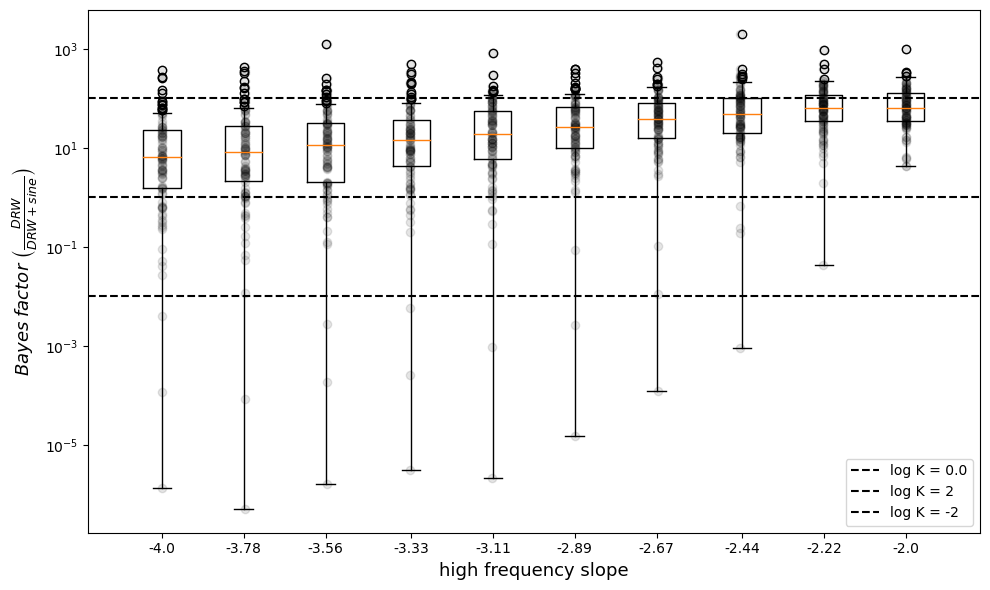

In [239]:

violin_plot_stack = []
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.highalpha == i].DRW_DRWsine_bayes.to_numpy())
    
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    plt.plot(np.ones(94)*i, simDATA_cropped.loc[simDATA_cropped.highalpha == i].DRW_DRWsine_bayes, 'ko', alpha = 0.1  )
    
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.highalpha.to_numpy())), decimals=2), widths=0.1)
plt.yscale('log')
for i in [0.,  2, -2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
#plt.gca().set_xticks(np.round(list(set(simDATA_cropped.highalpha.to_numpy())), decimals=2))
plt.legend(loc = 'lower right')
plt.xlim(-4.2, -1.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{DRW}{DRW +sine}\right)$', fontsize =13)
plt.tight_layout()
plt.show()

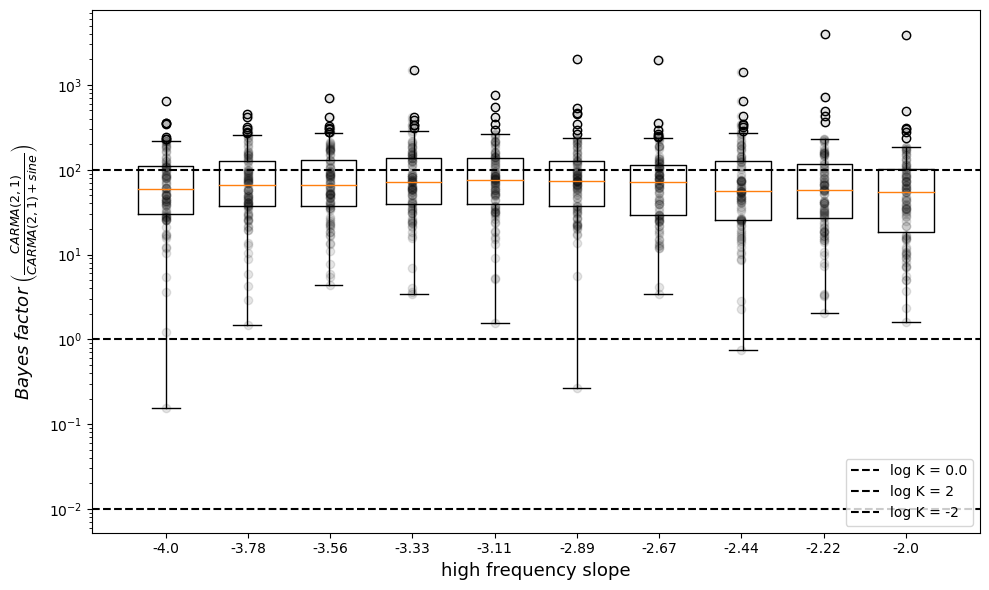

In [240]:
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    plt.plot(np.ones(94)*i, simDATA_cropped.loc[simDATA_cropped.highalpha == i].CARMA21_CARMA21sine_bayes, 'ko', alpha = 0.1  )
violin_plot_stack = []
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.highalpha == i].CARMA21_CARMA21sine_bayes.to_numpy())
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.highalpha.to_numpy())), decimals=2), widths=0.15)
plt.yscale('log')
for i in [0.,  2, -2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
plt.gca().set_xticks(list(set(simDATA_cropped.highalpha.to_numpy())))
plt.legend(loc = 'lower right')
plt.xlim(-4.2, -1.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{CARMA(2,1)}{CARMA(2,1) +sine}\right)$', fontsize = 13)
plt.tight_layout()
plt.show()

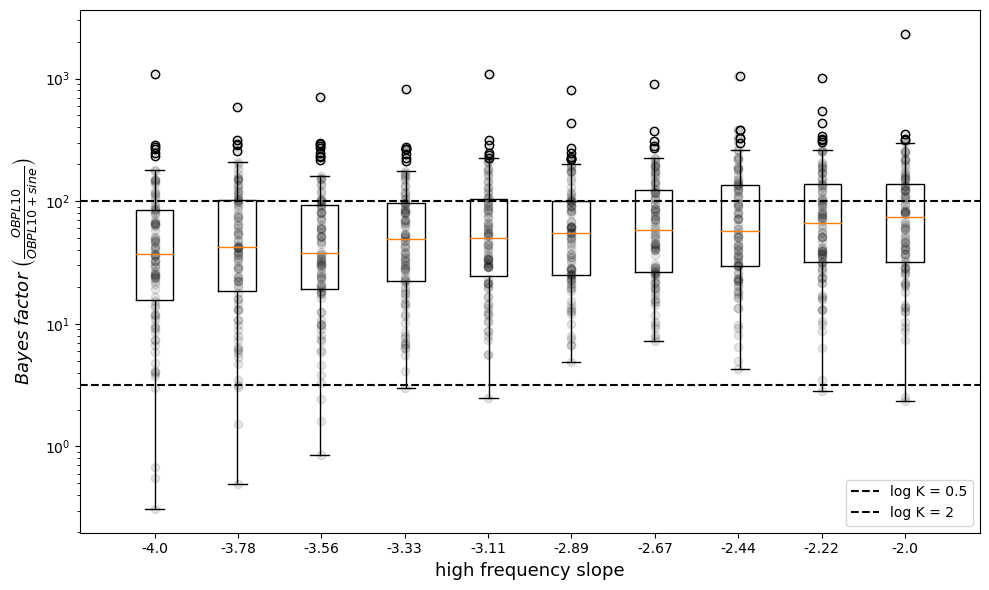

In [242]:
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    plt.plot(np.ones(94)*i, simDATA_cropped.loc[simDATA_cropped.highalpha == i].OBPL10_OBPLsine10_bayes, 'ko', alpha = 0.1  )
violin_plot_stack = []
for i in list(set(simDATA_cropped.highalpha.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.highalpha == i].OBPL10_OBPLsine10_bayes.to_numpy())
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.highalpha.to_numpy())), decimals=2), bootstrap=1000, widths=0.10)
plt.yscale('log')
for i in [0.5,  2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
plt.gca().set_xticks(list(set(simDATA_cropped.highalpha.to_numpy())))
plt.legend(loc = 'lower right')
plt.xlim(-4.2, -1.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{OBPL10}{OBPL10 +sine}\right)$', fontsize = 13)
plt.tight_layout()
plt.show()

In [275]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = 0, 0, 0
bayes_threshold = 2
for i, row in simDATA_cropped.iterrows():
    if np.log10(row.DRW_DRWsine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = 1
    if np.log10(row.DRW_DRWsine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = -1
    if np.log10(row.CARMA21_CARMA21sine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = 1
    if np.log10(row.CARMA21_CARMA21sine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = -1
    if np.log10(row.OBPL10_OBPLsine10_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = 1
    if np.log10(row.OBPL10_OBPLsine10_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = -1

#### Plots

In [276]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0
        if (key[0], -1) not in dictionary:
            BMCdict[(key[0], -1)] = 0

    return BMCdict

BMCdict_DRW =  get_best_model_counts(simDATA_cropped.groupby('highalpha')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
inc_DRW_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        highalpha_array.append(key[0])
        inc_DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])
    elif key[1]==-1:
        DRW_value_counts.append(BMCdict_DRW[key])


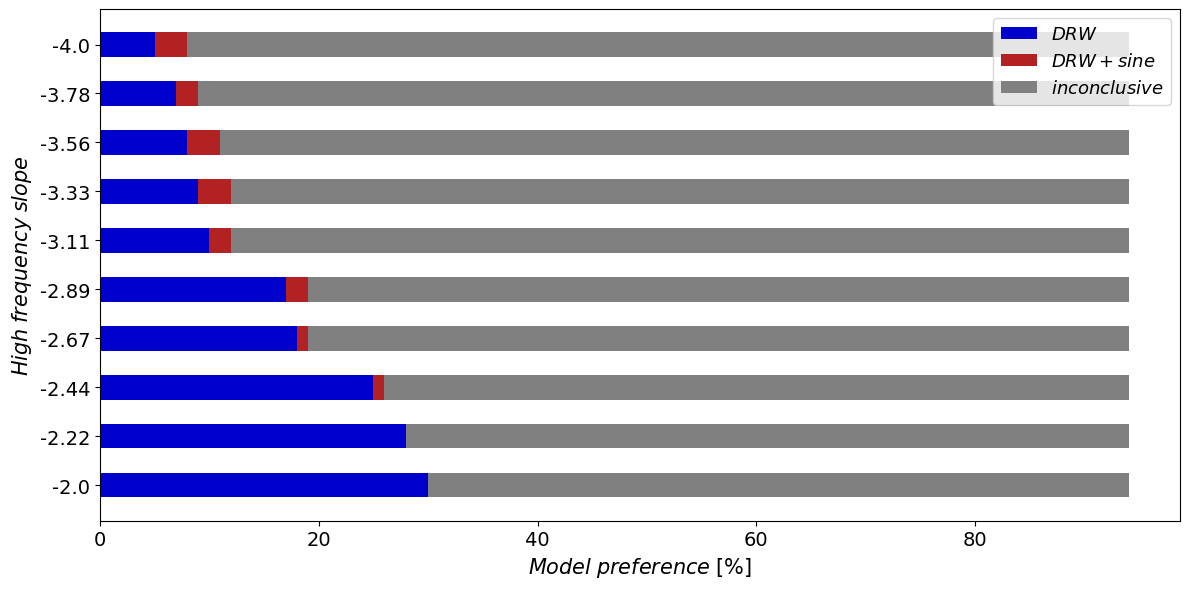

In [277]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), inc_DRW_value_counts, left= np.array(DRW_value_counts) + np.array(DRWsine_value_counts), height=0.5,  color='gray')
plt.tight_layout()
plt.legend(['$DRW$', '$DRW + sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('plots/DRWsine_highalpha_2_4.png', )
plt.show()

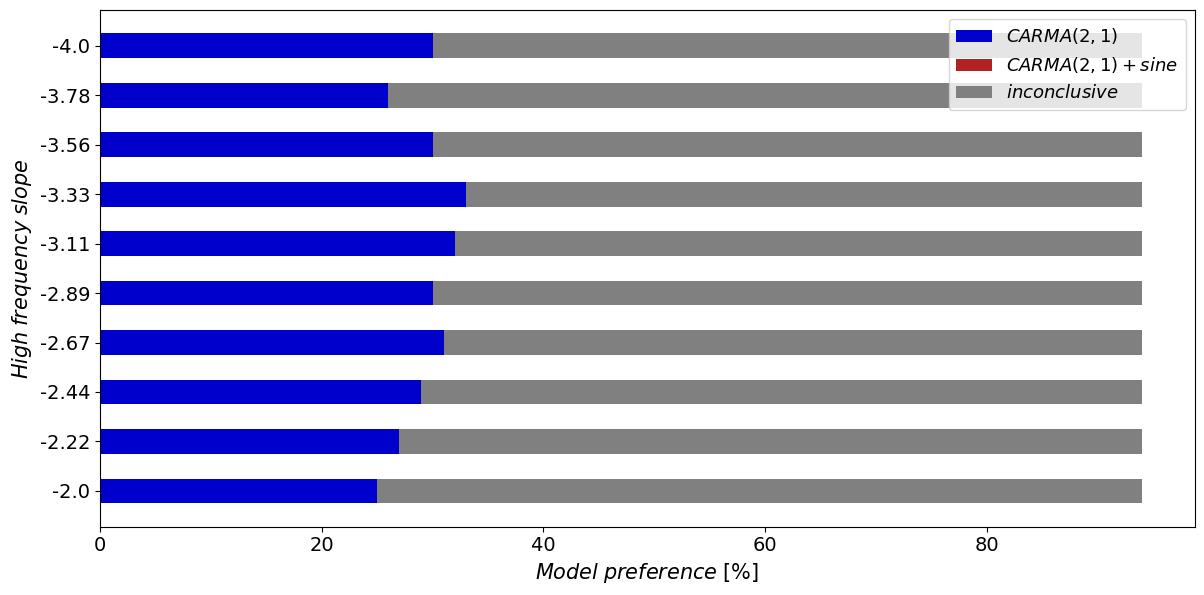

In [278]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

highalpha_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
inc_CARMA_value_counts = []
for key in BMCdict_CARMA21:
    if key[1]==0:
        highalpha_array.append(key[0])
        inc_CARMA_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==-1:
        CARMA21_value_counts.append(BMCdict_CARMA21[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), inc_CARMA_value_counts, left= np.array(CARMA21_value_counts) + np.array(CARMA21sine_value_counts), height=0.5,  color='gray')

plt.tight_layout()
plt.legend(['$CARMA(2,1)$', '$CARMA(2,1)+ sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.tick_params(labelsize=14)
# plt.savefig('plots/CARMA21sine_highalpha_2_4.png', )
plt.show()

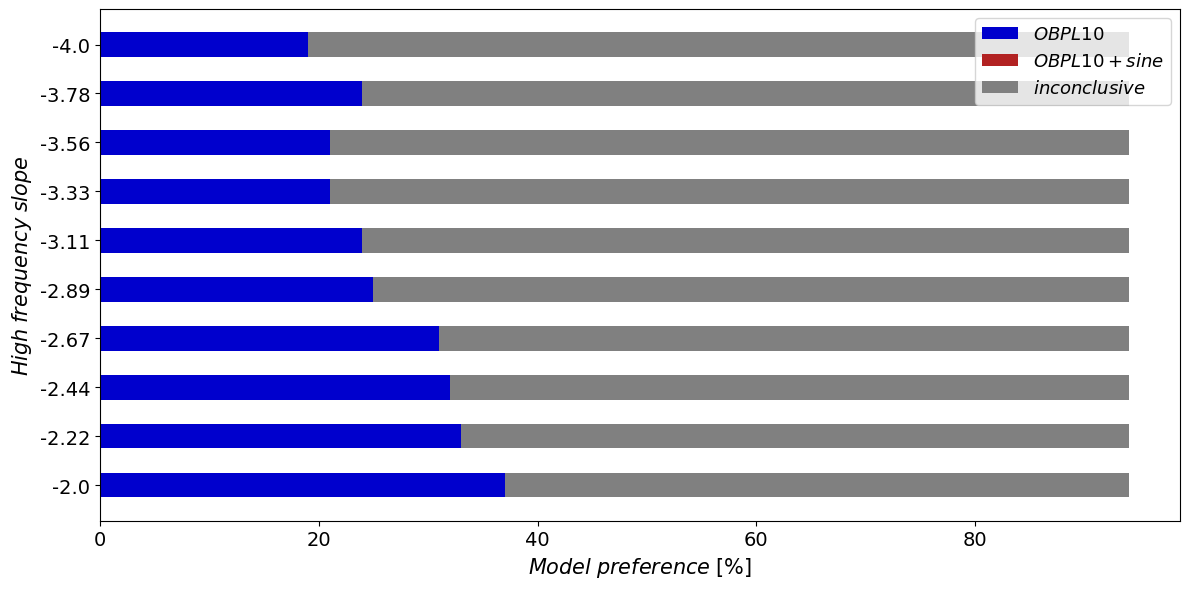

In [279]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('highalpha')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

highalpha_array = []
OBPL_value_counts = []
OBPLsine_value_counts = []
inc_OBPL_value_counts = []
for key in BMCdict_CARMA21:
    if key[1]==0:
        highalpha_array.append(key[0])
        inc_OBPL_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==-1:
        OBPL_value_counts.append(BMCdict_OBPL10[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine_value_counts, left=OBPL_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), inc_OBPL_value_counts, left= np.array(OBPL_value_counts) + np.array(OBPLsine_value_counts), height=0.5,  color='gray')

plt.tight_layout()
plt.legend(['$OBPL10$', '$OBPL10 + sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
# plt.savefig('plots/OBPL10sine_highalpha_2_4.png', )
plt.show()

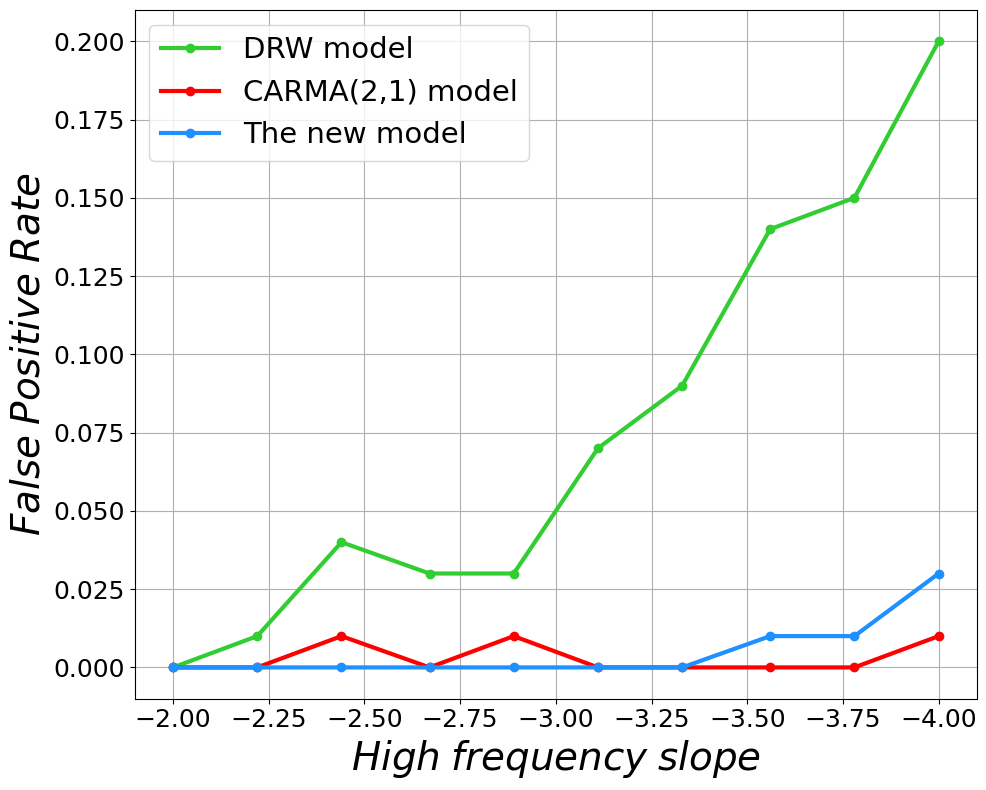

In [25]:
plt.figure(figsize=[10,8])
plt.plot(np.round(highalpha_array,decimals=2), np.array(DRWsine_value_counts)/100, 'o-', color = 'limegreen',lw=3, label = 'DRW model' )
plt.plot(np.round(highalpha_array,decimals=2), np.array(CARMA21sine_value_counts)/100, 'o-', color = 'red', lw=3 , label = 'CARMA(2,1) model')
plt.plot(np.round(highalpha_array,decimals=2), np.array(OBPLsine10_value_counts)/100, 'o-', color = 'dodgerblue', lw=3 , label = 'The new model')
plt.gca().invert_xaxis()
plt.grid()
plt.tick_params(labelsize=18)
plt.xlabel(r'$High\;frequency\;slope$', fontsize=28)
plt.ylabel(r'$False\;Positive\;Rate$', fontsize=28)
plt.tight_layout()
plt.legend(fontsize =21)
plt.savefig('plots/NAC/FPR_opaque.png', transparent = False)
plt.show()


In [53]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [54]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('highalpha')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [55]:
highalpha_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        highalpha_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])

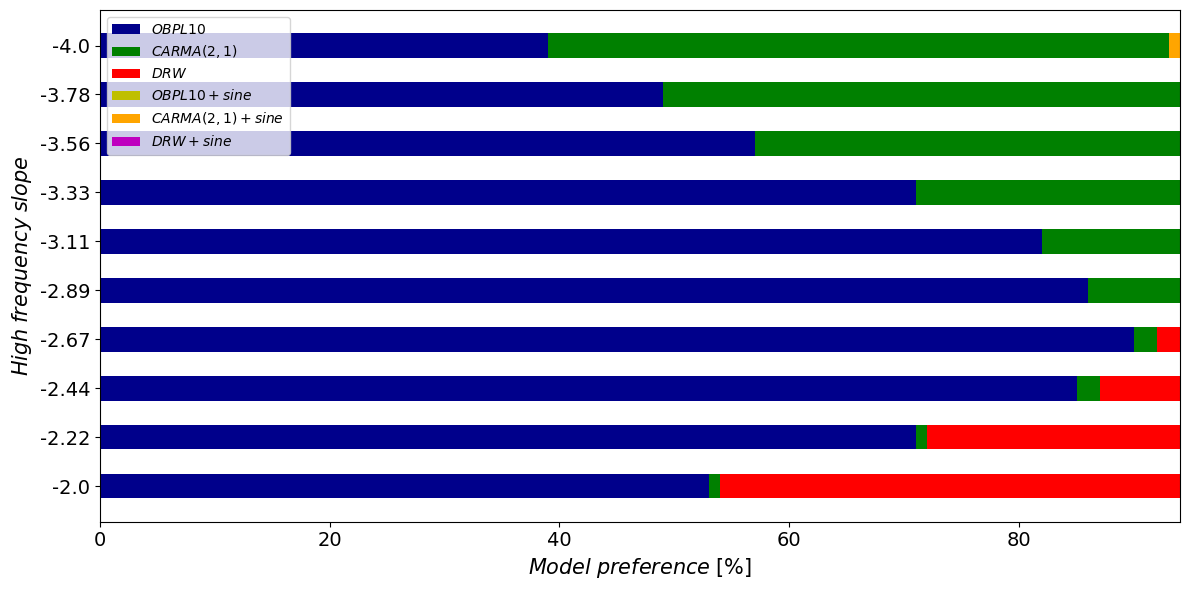

In [56]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='$OBPL10$', color='darkblue')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='$CARMA(2,1)$', color='g')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='$DRW$', color='r')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='$OBPL10 + sine$', color='y')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='$CARMA(2,1) + sine$', color='orange')
plt.barh(np.round(highalpha_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='$DRW + sine$', color='m')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.savefig('plots/Allmodels_highalpha_2_4.png')
plt.show()




## sims : low alpha = -1, high alpha = -3, NumofWINDOWS= [4,20]

#### Processing

In [280]:
DRW_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [281]:
DRW_filenames[-1][86:90], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('2699',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/2699_DRWsine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/2699_CARMA21.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/2699_CARMA21sine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/2699_OBPL10.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/2699_OBPLsine10.json')

In [282]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[86:90]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[86:90]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[86:90]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[86:90]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[86:90]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[86:90]))


In [283]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [284]:
len(common_IDs)

1700

In [285]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPLsine10.json')

In [286]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_4_20.csv')

In [287]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf', 'DRWsine_per', 'CARMA21sine_per', 'OBPL10sine_per'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,DRWsine_per,CARMA21sine_per,OBPL10sine_per
0,1000.0,48090.0,83055.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,59982.0,23885.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,95580.0,42170.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,86308.0,43423.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,7357.0,86838.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,12372.0,95589.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1696,2696.0,75974.0,42835.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1697,2697.0,40384.0,77520.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1698,2698.0,40895.0,21505.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][86:90])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    # simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    # simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    # simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    # simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    simDATA.loc[simDATA.ID == ID, 'DRWsine_per'] = np.median(DRWsine_dict['t0'])
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_per'] = np.median(CARMA21sine_dict['t0'])
    simDATA.loc[simDATA.ID == ID, 'OBPL10sine_per'] = np.median(OBPLsine10_dict['t0'])
        
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [11]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [289]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [290]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,DRWsine_per,CARMA21sine_per,OBPL10sine_per,bestMODEL
0,1000.0,48090.0,83055.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,159.080326,153.066614,0,0,0,0,0.924823,1.517100,0.959964,None
1,1001.0,59982.0,23885.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,153.299824,149.256091,0,0,0,0,2.246349,2.364140,2.716343,None
2,1002.0,95580.0,42170.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,152.069868,144.763715,0,0,0,0,1.216806,2.022732,2.077967,None
3,1003.0,86308.0,43423.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,146.936511,144.344284,0,0,0,0,1.745206,1.846031,1.717191,None
4,1004.0,7357.0,86838.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,143.332169,143.041689,0,0,0,0,0.922846,1.386343,0.934168,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,12372.0,95589.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,738.158570,733.198896,0,0,0,0,2.494972,3.342071,2.958612,None
1696,2696.0,75974.0,42835.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,760.866646,755.343437,0,0,0,0,2.099601,2.631784,2.124362,None
1697,2697.0,40384.0,77520.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,716.171926,711.124323,0,0,0,0,2.248862,3.023737,2.664782,None
1698,2698.0,40895.0,21505.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,754.856498,748.209740,0,0,0,0,2.205448,2.640622,2.106212,None


In [291]:
set_filterd = set(simDATA_cropped.sort_values("ID").ID.to_numpy())
set_base = set(simDATA.sort_values("ID").ID.to_numpy())

In [292]:
failed_IDs = list(set_base - set_filterd)
failed_IDs.sort()

In [293]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [294]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10        1395
CARMA21        286
DRW             12
OBPLsine10       6
DRWsine          1
Name: count, dtype: int64

In [295]:
simDATA_cropped.loc[simDATA_cropped.bestMODEL=='DRW']#[['DRW_log_Z_mean', 'CARMA21_log_Z_mean', 'OBPL10_log_Z_mean']]

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,DRWsine_per,CARMA21sine_per,OBPL10sine_per,bestMODEL
43,1043.0,64634.0,8348.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,145.568403,143.201795,0,0,0,0,4.018056,3.825272,4.118071,DRW
158,1158.0,98437.0,17954.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,5.0,...,184.968690,183.044283,0,0,0,0,2.665910,2.867986,3.158337,DRW
278,1278.0,99608.0,13108.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,6.0,...,217.602919,213.311209,0,0,0,0,1.764952,3.572551,2.108784,DRW
340,1340.0,69976.0,33905.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,7.0,...,253.781337,250.343012,0,0,0,0,3.484695,3.479724,3.468677,DRW
478,1478.0,99608.0,13108.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,8.0,...,293.609167,289.422959,0,0,0,0,1.682741,2.039548,1.464817,DRW
507,1507.0,95118.0,99339.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,9.0,...,315.943925,312.866127,0,0,0,0,4.449544,4.377953,4.319879,DRW
534,1534.0,40142.0,14390.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,9.0,...,313.294181,310.168107,0,0,0,0,2.091514,3.768800,2.056891,DRW
556,1556.0,96975.0,39024.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,9.0,...,314.908891,312.017021,0,0,0,0,3.450883,3.325453,3.489053,DRW
565,1565.0,34989.0,12133.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,9.0,...,293.779144,291.294207,0,0,0,0,1.665604,3.722349,1.281025,DRW
578,1578.0,99608.0,13108.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,9.0,...,332.865630,327.284938,0,0,0,0,2.380254,3.465571,2.302444,DRW


In [296]:
simDATA_cropped['DRW_DRWsine_bayes'] = np.exp(simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.DRWsine_log_Z_mean)
simDATA_cropped['CARMA21_CARMA21sine_bayes'] = np.exp(simDATA_cropped.CARMA21_log_Z_mean - simDATA_cropped.CARMA21sine_log_Z_mean)
simDATA_cropped['OBPL10_OBPLsine10_bayes'] = np.exp(simDATA_cropped.OBPL10_log_Z_mean - simDATA_cropped.OBPLsine10_log_Z_mean)

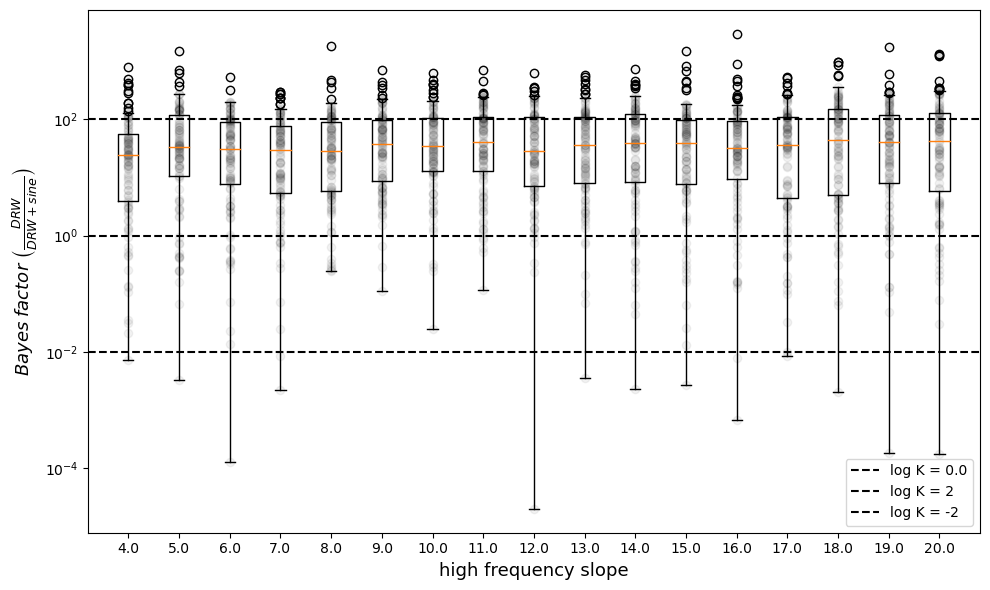

In [297]:

violin_plot_stack = []
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].DRW_DRWsine_bayes.to_numpy())
    
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    plt.plot(np.ones(100)*i, simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].DRW_DRWsine_bayes, 'ko', alpha = 0.05  )
    
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.NumofWINDOW.to_numpy())), decimals=2), widths=0.4)
plt.yscale('log')
for i in [0.,  2, -2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
#plt.gca().set_xticks(np.round(list(set(simDATA_cropped.highalpha.to_numpy())), decimals=2))
plt.legend(loc = 'lower right')
plt.xlim(3.2, 20.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{DRW}{DRW +sine}\right)$', fontsize =13)
plt.tight_layout()
plt.show()

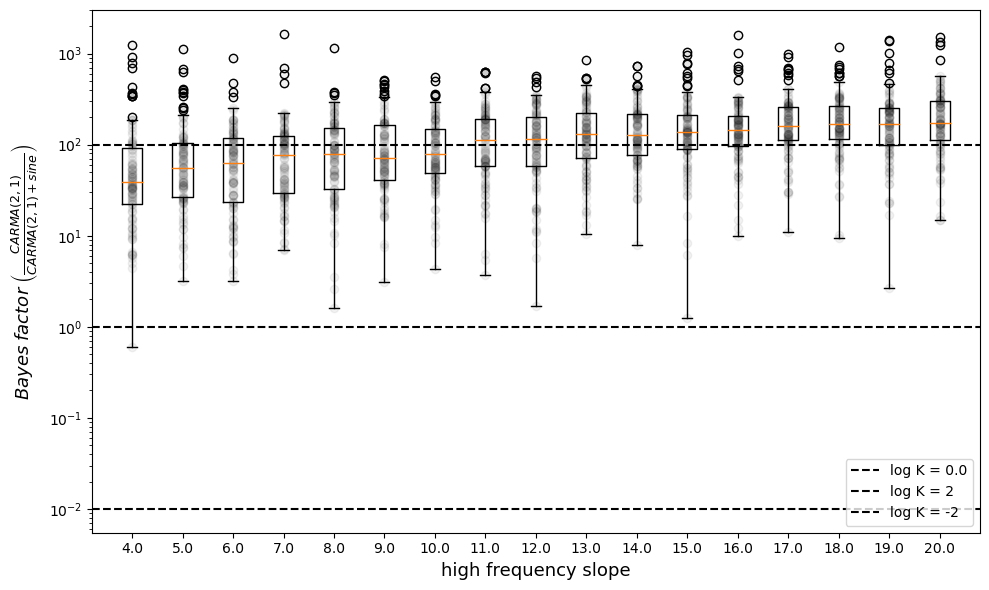

In [298]:
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    plt.plot(np.ones(100)*i, simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].CARMA21_CARMA21sine_bayes, 'ko', alpha = 0.05  )
violin_plot_stack = []
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].CARMA21_CARMA21sine_bayes.to_numpy())
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.NumofWINDOW.to_numpy())), decimals=2), widths=0.4)
plt.yscale('log')
for i in [0.,  2, -2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
plt.gca().set_xticks(list(set(simDATA_cropped.NumofWINDOW.to_numpy())))
plt.legend(loc = 'lower right')
plt.xlim(3.2, 20.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{CARMA(2,1)}{CARMA(2,1) +sine}\right)$', fontsize = 13)
plt.tight_layout()
plt.show()

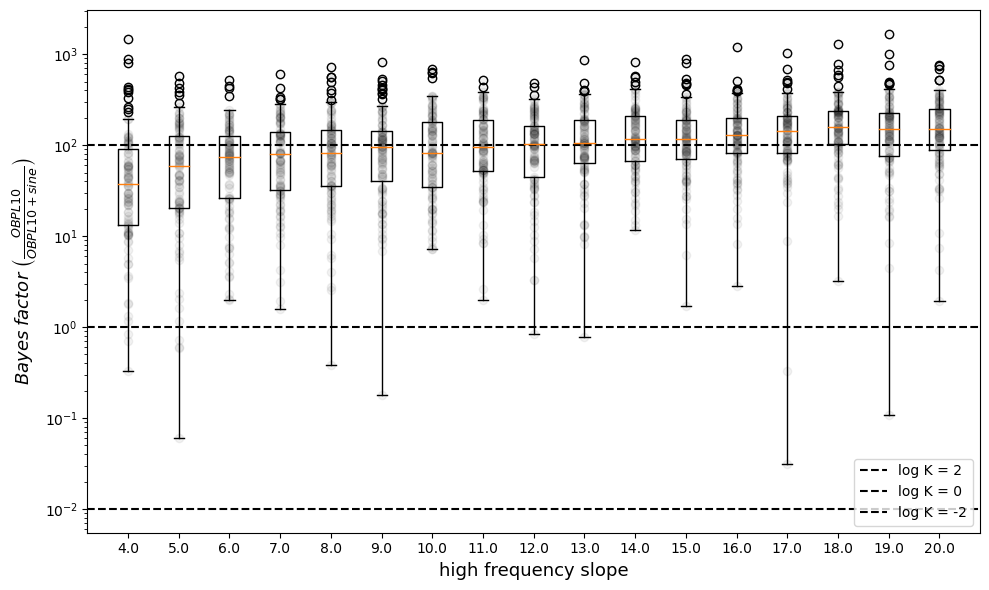

In [299]:
plt.figure(figsize=[10, 6])
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    plt.plot(np.ones(100)*i, simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].OBPL10_OBPLsine10_bayes, 'ko', alpha = 0.05  )
violin_plot_stack = []
for i in list(set(simDATA_cropped.NumofWINDOW.to_numpy())):
    violin_plot_stack.append(simDATA_cropped.loc[simDATA_cropped.NumofWINDOW == i].OBPL10_OBPLsine10_bayes.to_numpy())
plt.boxplot(violin_plot_stack, positions=np.round(list(set(simDATA_cropped.NumofWINDOW.to_numpy())), decimals=2), bootstrap=1000, widths=0.40)
plt.yscale('log')
for i in [2,  0, -2]:
    plt.axhline(10**i, label = 'log K = '+str(i), color = 'k', ls = '--')
plt.gca().set_xticks(list(set(simDATA_cropped.NumofWINDOW.to_numpy())))
plt.legend(loc = 'lower right')
plt.xlim(3.2, 20.8)
plt.xlabel('high frequency slope', fontsize = 13)
plt.ylabel(r'$Bayes\;factor\;\left(\frac{OBPL10}{OBPL10 +sine}\right)$', fontsize = 13)
plt.tight_layout()
plt.show()

In [320]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = 0, 0, 0
bayes_threshold = 2
for i, row in simDATA_cropped.iterrows():
    if np.log10(row.DRW_DRWsine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = 1
    if np.log10(row.DRW_DRWsine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = -1
    if np.log10(row.CARMA21_CARMA21sine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = 1
    if np.log10(row.CARMA21_CARMA21sine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = -1
    if np.log10(row.OBPL10_OBPLsine10_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = 1
    if np.log10(row.OBPL10_OBPLsine10_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = -1

AttributeError: 'Series' object has no attribute 'DRW_DRWsine_bayes'

#### Plots

In [302]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0
        if (key[0], -1) not in dictionary:
            BMCdict[(key[0], -1)] = 0

    return BMCdict

BMCdict_DRW =  get_best_model_counts(simDATA_cropped.groupby('NumofWINDOW')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
inc_DRW_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        inc_DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])
    elif key[1]==-1:
        DRW_value_counts.append(BMCdict_DRW[key])


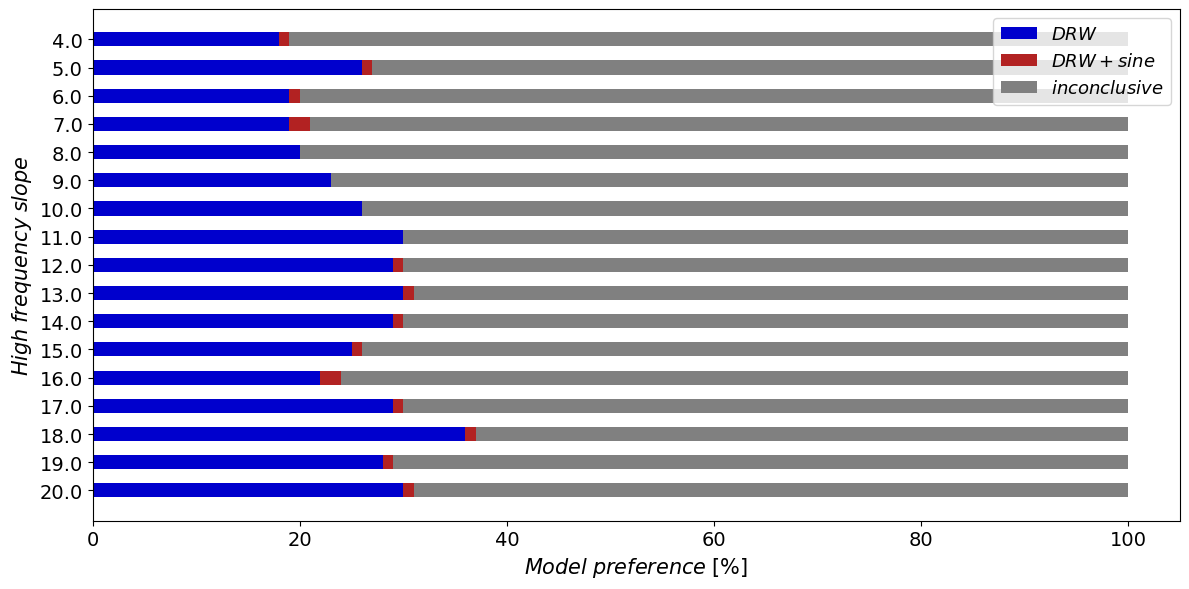

In [303]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), inc_DRW_value_counts, left= np.array(DRW_value_counts) + np.array(DRWsine_value_counts), height=0.5,  color='gray')
plt.tight_layout()
plt.legend(['$DRW$', '$DRW + sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('plots/DRWsine_highalpha_2_4.png', )
plt.show()

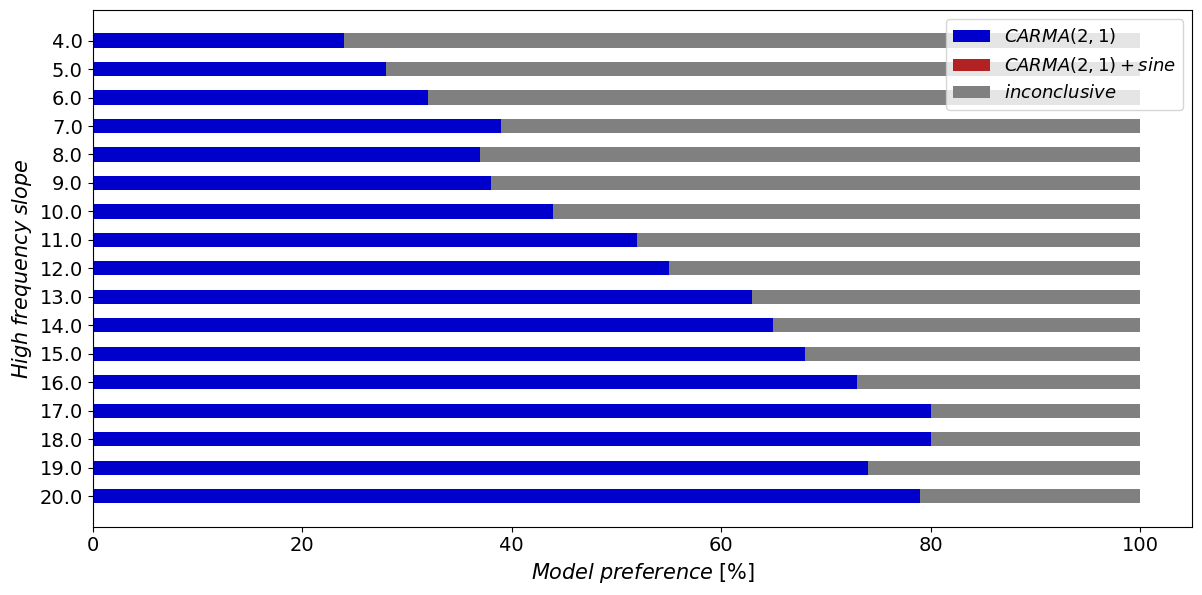

In [304]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
inc_CARMA_value_counts = []
for key in BMCdict_CARMA21:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        inc_CARMA_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==-1:
        CARMA21_value_counts.append(BMCdict_CARMA21[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), inc_CARMA_value_counts, left= np.array(CARMA21_value_counts) + np.array(CARMA21sine_value_counts), height=0.5,  color='gray')

plt.tight_layout()
plt.legend(['$CARMA(2,1)$', '$CARMA(2,1)+ sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.tick_params(labelsize=14)
# plt.savefig('plots/CARMA21sine_highalpha_2_4.png', )
plt.show()

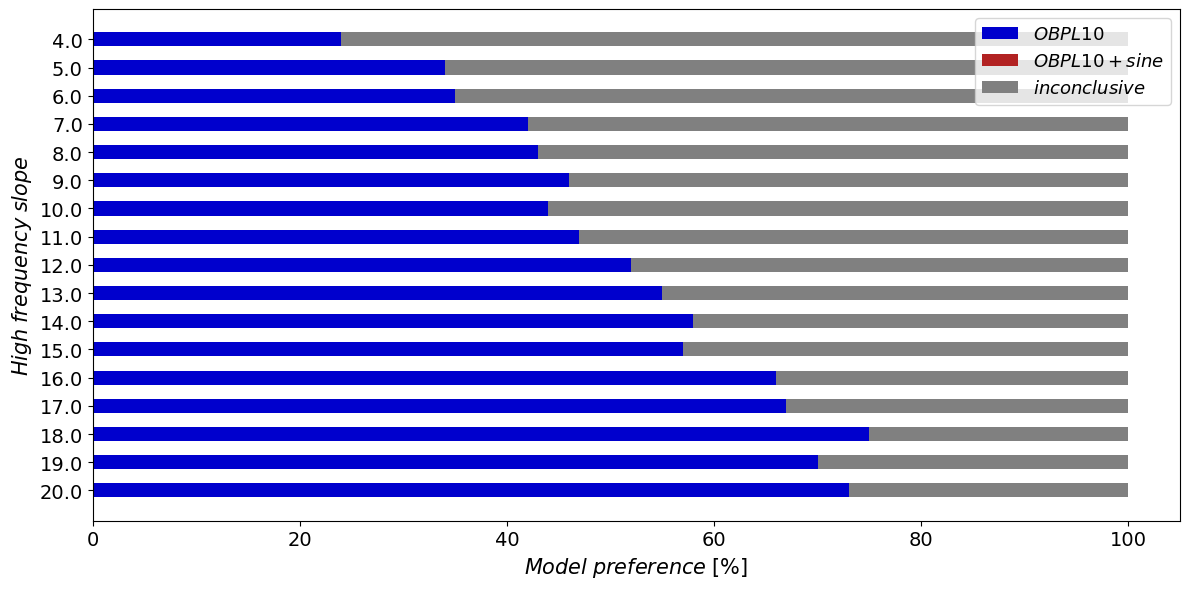

In [305]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
OBPL_value_counts = []
OBPLsine_value_counts = []
inc_OBPL_value_counts = []
for key in BMCdict_CARMA21:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        inc_OBPL_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==-1:
        OBPL_value_counts.append(BMCdict_OBPL10[key])

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine_value_counts, left=OBPL_value_counts, height=0.5,  color='firebrick')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), inc_OBPL_value_counts, left= np.array(OBPL_value_counts) + np.array(OBPLsine_value_counts), height=0.5,  color='gray')

plt.tight_layout()
plt.legend(['$OBPL10$', '$OBPL10 + sine$', '$inconclusive$'], fontsize=13, loc = 'upper right')
plt.ylabel('$High\;frequency\;slope$', fontsize=15)
plt.xlabel('$Model\;preference\;[\%]$', fontsize=15)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=14)
plt.tight_layout()
# plt.savefig('plots/OBPL10sine_highalpha_2_4.png', )
plt.show()

In [39]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [40]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('NumofWINDOW')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [41]:
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        NumofWINDOW_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])
        
NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5


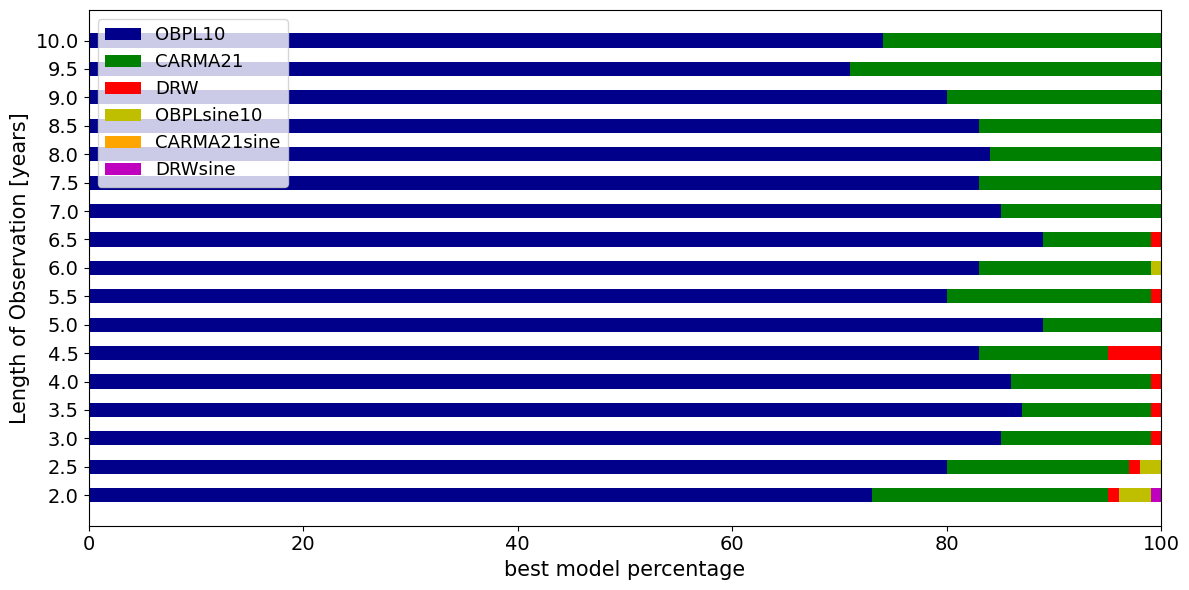

In [42]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='darkblue')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='orange')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)

plt.legend( fontsize=13, loc = 'upper left')
plt.tight_layout()
plt.show()




## sims : low alpha = -1, high alpha = -2, NumofWINDOWS= [4,20]

#### Processing

In [3]:
DRW_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [4]:
DRW_filenames[-1][86:90], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('2697',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/2697_DRWsine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/2697_CARMA21.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/2697_CARMA21sine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/2697_OBPL10.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/2697_OBPLsine10.json')

In [5]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[86:90]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[86:90]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[86:90]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[86:90]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[86:90]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[86:90]))


In [6]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [7]:
len(common_IDs)

1357

In [8]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_2_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPLsine10.json')

In [9]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_NumofWINDOW_4_20.csv')

In [10]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,14898.0,26725.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,9297.0,37710.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,21839.0,18940.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,94915.0,98744.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,68545.0,25213.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,76093.0,61450.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1696,2696.0,85461.0,35810.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1697,2697.0,28676.0,40595.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1698,2698.0,3885.0,38877.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][86:90])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

KeyboardInterrupt: 

In [ ]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [ ]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [ ]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,14898.0,26725.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,105.225418,108.653763,104.998391,109.410687,105.397554,4.639839,3.805338,2.533679,2.985983,None
1,1001.0,9297.0,37710.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,129.325118,132.138623,127.399449,134.310728,129.523402,5.705841,7.026004,2.786869,6.691167,None
2,1002.0,21839.0,18940.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,119.035283,123.144875,118.955057,124.430828,120.260033,6.257404,5.923321,3.568142,8.514939,None
3,1003.0,94915.0,98744.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,119.520356,122.817999,117.948159,124.910749,120.316010,6.480594,6.427103,1.913775,11.418265,None
4,1004.0,68545.0,25213.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,120.798461,123.416343,119.320343,124.820827,121.085819,4.127133,7.366541,2.728543,3.284320,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2693.0,51325.0,5944.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,624.382554,627.980179,622.253389,633.156054,628.151068,3.032719,2.669589,0.529160,1.265758,None
1694,2694.0,62538.0,53174.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,606.929113,610.644958,604.456292,611.233144,605.640148,2.312744,2.080734,1.791842,2.616462,None
1695,2695.0,76093.0,61450.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,584.118445,586.459079,582.188620,584.212852,579.426859,2.483944,2.338461,0.657981,0.656362,None
1696,2696.0,85461.0,35810.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,610.100476,611.769614,608.477702,612.684113,610.550891,1.448516,1.376886,0.385535,0.554326,None


In [57]:
import corner
def plot_corner(dictionary, exclude_keys=['log_Z_mean', 'log_Z_uncert']):
    if exclude_keys is None:
        exclude_keys = []

    filtered_data = {key: value for key, value in dictionary.items() if key not in exclude_keys}

    data = np.array([array for array in filtered_data.values()]).T
    
    fig = corner.corner(data, bins=50 ,  labels=list(filtered_data.keys()), show_titles=True, title_kwargs={"fontsize": 12})
    
    plt.show()

In [58]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->166-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->185-->186-->187-->188-->189-->190-->191-->192-->193-->194-->

795-->796-->797-->798-->799-->800-->801-->802-->803-->804-->805-->806-->807-->808-->809-->810-->812-->813-->814-->815-->816-->817-->818-->819-->820-->821-->822-->823-->826-->827-->834-->835-->836-->837-->838-->839-->840-->841-->842-->843-->844-->846-->847-->848-->850-->851-->852-->853-->854-->856-->857-->858-->859-->862-->863-->864-->865-->866-->868-->870-->871-->872-->873-->876-->877-->878-->879-->880-->881-->882-->883-->884-->885-->886-->887-->888-->889-->890-->891-->892-->894-->895-->896-->897-->898-->899-->902-->903-->904-->905-->906-->907-->908-->909-->910-->912-->913-->914-->915-->916-->917-->918-->919-->920-->921-->922-->923-->924-->926-->927-->928-->929-->930-->931-->932-->933-->934-->935-->938-->939-->940-->941-->942-->944-->946-->948-->949-->954-->955-->956-->958-->964-->965-->966-->968-->970-->971-->972-->973-->976-->977-->980-->982-->983-->984-->985-->986-->987-->988-->990-->991-->992-->993-->996-->997-->998-->999-->1000-->1001-->1002-->1003-->1004-->1005-->1006-->1007-->10

In [59]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         672
DRW            666
CARMA21         14
OBPLsine10       3
CARMA21sine      1
DRWsine          1
Name: count, dtype: int64

In [60]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,14898.0,26725.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,109.163470,105.225418,108.653763,104.998391,109.410687,105.397554,4.639839,3.805338,2.533679,2.985983
1,1001.0,9297.0,37710.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,133.455524,129.325118,132.138623,127.399449,134.310728,129.523402,5.705841,7.026004,2.786869,6.691167
2,1002.0,21839.0,18940.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,123.879848,119.035283,123.144875,118.955057,124.430828,120.260033,6.257404,5.923321,3.568142,8.514939
3,1003.0,94915.0,98744.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,123.928803,119.520356,122.817999,117.948159,124.910749,120.316010,6.480594,6.427103,1.913775,11.418265
4,1004.0,68545.0,25213.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,4.0,...,124.200133,120.798461,123.416343,119.320343,124.820827,121.085819,4.127133,7.366541,2.728543,3.284320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,76093.0,61450.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,587.344804,584.118445,586.459079,582.188620,584.212852,579.426859,2.483944,2.338461,0.657981,0.656362
1696,2696.0,85461.0,35810.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,614.505364,610.100476,611.769614,608.477702,612.684113,610.550891,1.448516,1.376886,0.385535,0.554326
1697,2697.0,28676.0,40595.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,590.602159,584.897476,587.884892,582.565034,587.952198,582.177554,3.428926,3.097739,0.901160,1.229092
1698,2698.0,3885.0,38877.0,0.15,0.015,0.00274,-1.0,-2.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = -1, -1,-1

In [62]:
simDATA_cropped['DRWsine_bool'] = np.array(simDATA_cropped['DRW_log_Z_mean']<simDATA_cropped['DRWsine_log_Z_mean']).astype('int')
simDATA_cropped['CARMA21sine_bool'] = np.array(simDATA_cropped['CARMA21_log_Z_mean']<simDATA_cropped['CARMA21sine_log_Z_mean']).astype('int')
simDATA_cropped['OBPLsine_bool'] = np.array(simDATA_cropped['OBPL10_log_Z_mean']<simDATA_cropped['OBPLsine10_log_Z_mean']).astype('int')

#### Plots

In [63]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0

    return BMCdict

BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5

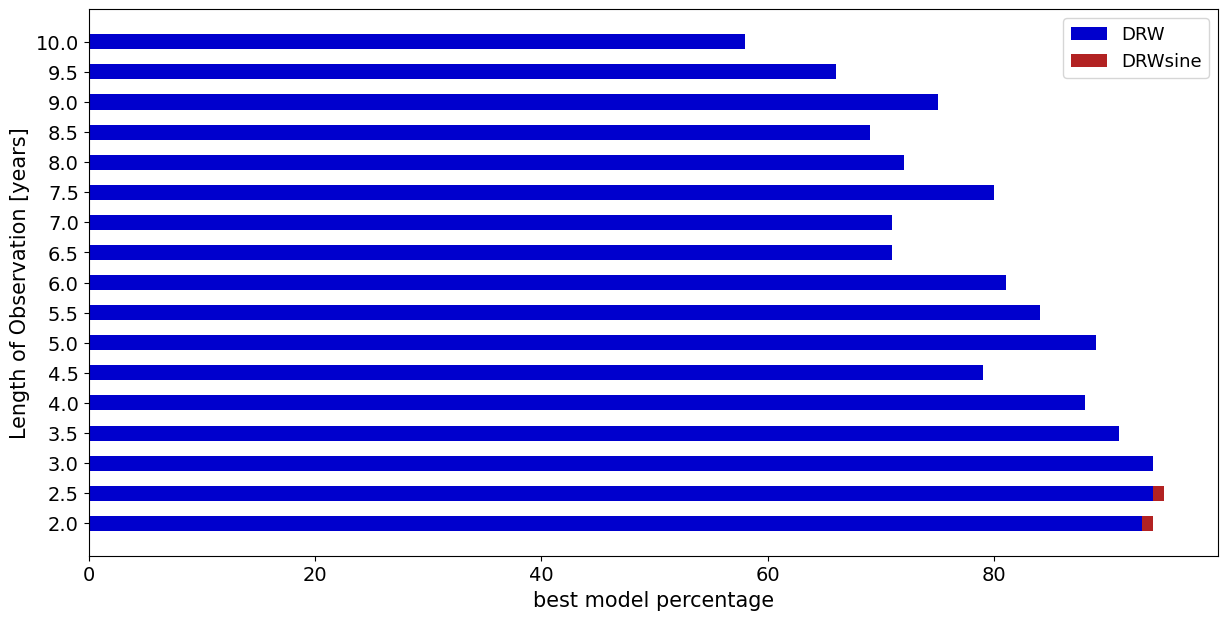

In [64]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

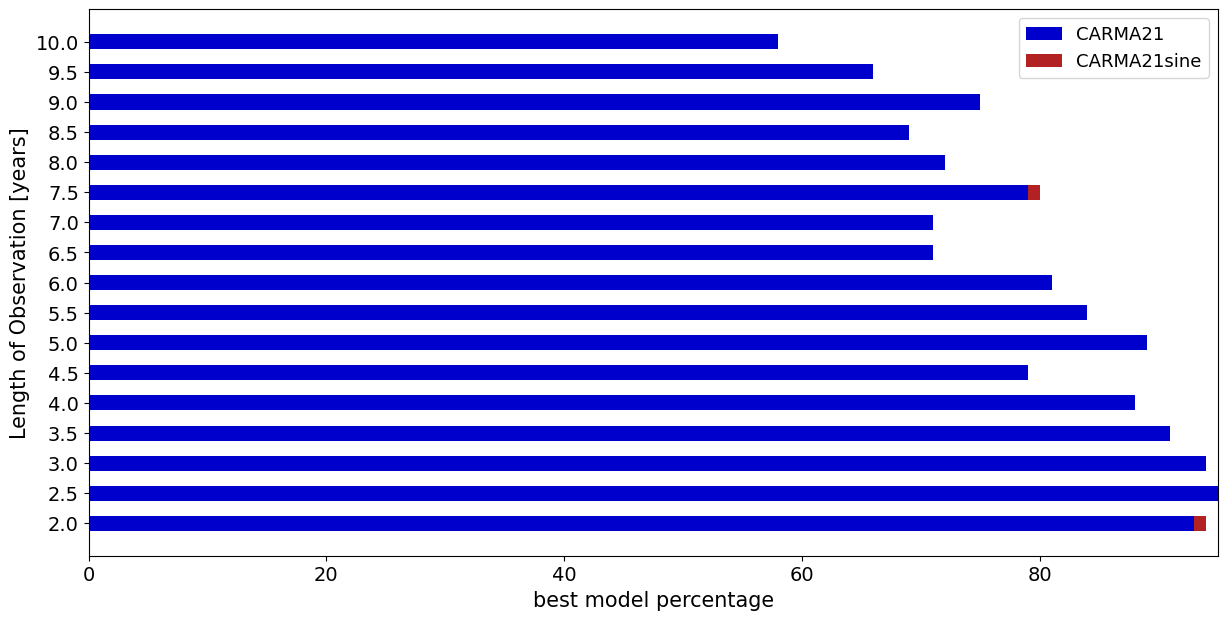

In [65]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        CARMA21_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5
plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['CARMA21', 'CARMA21sine'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

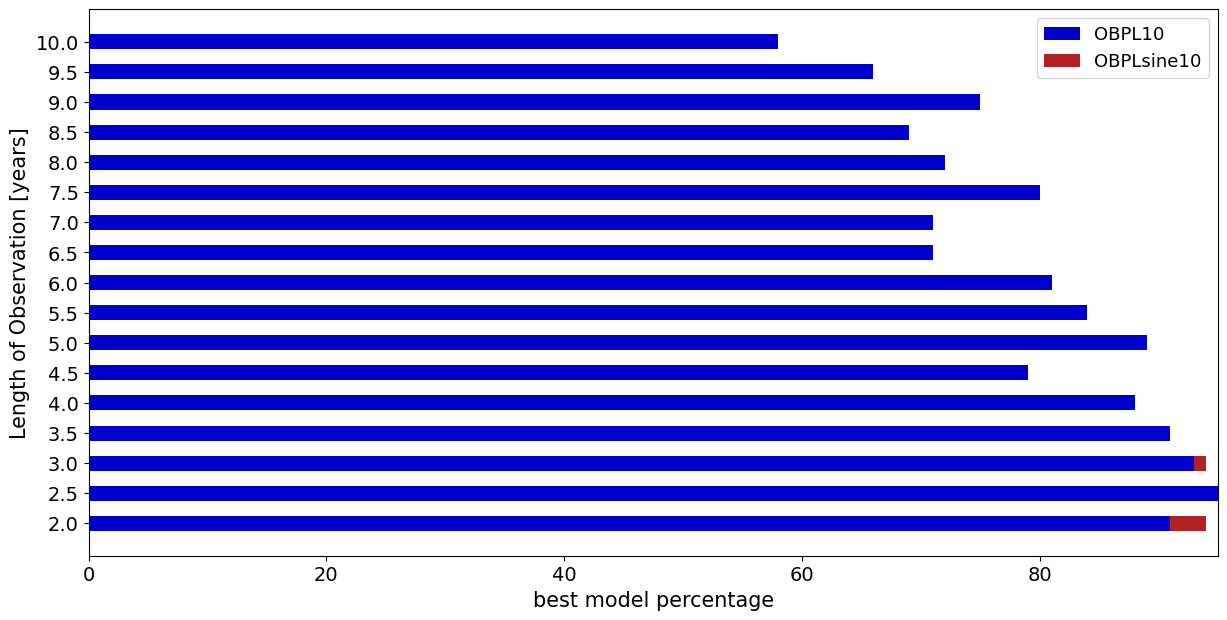

In [71]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        OBPL10_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine10_value_counts.append(BMCdict_OBPL10[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine10_value_counts, left=OBPL10_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['OBPL10', 'OBPLsine10'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [72]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [73]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('NumofWINDOW')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [74]:
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        NumofWINDOW_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])
        
NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5


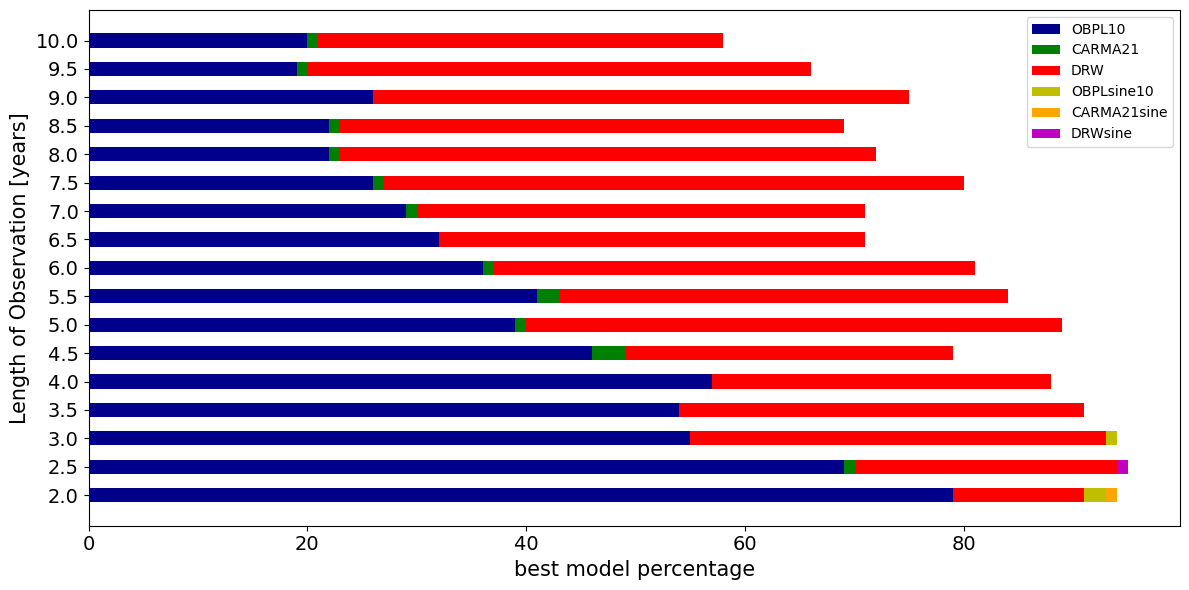

In [75]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='darkblue')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='orange')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()




## sims : low alpha = -1, high alpha = -4, NumofWINDOWS= [4,20]

#### Processing

In [76]:
DRW_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [77]:
DRW_filenames[-1][86:90], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('2692',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/2692_DRWsine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/2692_CARMA21.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/2692_CARMA21sine.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/2692_OBPL10.json',
 'helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/2692_OBPLsine10.json')

In [78]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[86:90]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[86:90]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[86:90]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[86:90]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[86:90]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[86:90]))


In [79]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [80]:
len(common_IDs)

1306

In [81]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_NumofWINDOW_4_20/json_files/highALPHA_4_NumofWINDOW_4_20/outputs/'+str(id)+'_OBPLsine10.json')

In [82]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_4_NumofWINDOW_4_20.csv')

In [83]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,74585.0,42244.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,47502.0,11131.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,28173.0,90372.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,90333.0,86851.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,98746.0,2643.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,44435.0,476.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1696,2696.0,38897.0,7239.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1697,2697.0,41499.0,10032.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1698,2698.0,25470.0,29734.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][86:90])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [85]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [86]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [87]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,74585.0,42244.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,150.231141,155.546066,151.128744,154.781375,152.315033,1.415016,2.558610,0.919035,2.252158,None
1,1001.0,47502.0,11131.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,134.580916,146.252806,143.163229,145.383116,142.661668,0.912668,1.056116,0.886398,1.001727,None
2,1002.0,28173.0,90372.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,127.800127,131.014262,127.325061,130.356929,128.732929,1.686053,3.406700,0.990781,65.192555,None
3,1003.0,90333.0,86851.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,139.834190,148.012715,143.998989,144.029472,142.060940,1.530689,1.466526,1.051261,1.181455,None
4,1004.0,98746.0,2643.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,150.361251,155.312520,150.028432,155.396197,152.287141,1.249941,2.938388,1.132832,9.074776,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,2684.0,2051.0,133.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,763.168747,786.303103,781.143252,786.071818,783.187604,0.354276,0.395672,0.420638,0.452258,None
1685,2685.0,24411.0,55357.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,732.645765,753.301092,748.074924,750.326878,744.836553,0.766836,0.862569,0.702819,0.602994,None
1688,2688.0,4390.0,75763.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,741.217822,770.086217,764.510518,771.306310,766.268906,0.680907,0.701293,0.701994,0.723867,None
1689,2689.0,8199.0,52601.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,732.273657,750.767770,745.162473,752.163349,746.881251,0.790580,0.719167,0.951057,0.856755,None


In [102]:
simDATA[]

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,74585.0,42244.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,152.678566,150.231141,155.546066,151.128744,154.781375,152.315033,1.415016,2.558610,0.919035,2.252158
1,1001.0,47502.0,11131.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,136.126881,134.580916,146.252806,143.163229,145.383116,142.661668,0.912668,1.056116,0.886398,1.001727
2,1002.0,28173.0,90372.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,131.218368,127.800127,131.014262,127.325061,130.356929,128.732929,1.686053,3.406700,0.990781,65.192555
3,1003.0,90333.0,86851.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,140.759159,139.834190,148.012715,143.998989,144.029472,142.060940,1.530689,1.466526,1.051261,1.181455
4,1004.0,98746.0,2643.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,154.504743,150.361251,155.312520,150.028432,155.396197,152.287141,1.249941,2.938388,1.132832,9.074776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,44435.0,476.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1696,2696.0,38897.0,7239.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1697,2697.0,41499.0,10032.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1698,2698.0,25470.0,29734.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
import corner
def plot_corner(dictionary, exclude_keys=['log_Z_mean', 'log_Z_uncert']):
    if exclude_keys is None:
        exclude_keys = []

    filtered_data = {key: value for key, value in dictionary.items() if key not in exclude_keys}

    data = np.array([array for array in filtered_data.values()]).T
    
    fig = corner.corner(data, bins=50 ,  labels=list(filtered_data.keys()), show_titles=True, title_kwargs={"fontsize": 12})
    
    plt.show()

In [89]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->52-->53-->54-->55-->56-->57-->58-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->176-->177-->178-->179-->182-->183-->186-->187-->188-->189-->190-->191-->192-->193-->194-->195-->196-->197-->198-->199--

In [90]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         680
CARMA21        623
DRW              1
OBPLsine10       1
CARMA21sine      1
Name: count, dtype: int64

In [91]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,74585.0,42244.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,152.678566,150.231141,155.546066,151.128744,154.781375,152.315033,1.415016,2.558610,0.919035,2.252158
1,1001.0,47502.0,11131.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,136.126881,134.580916,146.252806,143.163229,145.383116,142.661668,0.912668,1.056116,0.886398,1.001727
2,1002.0,28173.0,90372.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,131.218368,127.800127,131.014262,127.325061,130.356929,128.732929,1.686053,3.406700,0.990781,65.192555
3,1003.0,90333.0,86851.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,140.759159,139.834190,148.012715,143.998989,144.029472,142.060940,1.530689,1.466526,1.051261,1.181455
4,1004.0,98746.0,2643.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,4.0,...,154.504743,150.361251,155.312520,150.028432,155.396197,152.287141,1.249941,2.938388,1.132832,9.074776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,44435.0,476.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1696,2696.0,38897.0,7239.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1697,2697.0,41499.0,10032.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1698,2698.0,25470.0,29734.0,0.15,0.015,0.00274,-1.0,-4.0,10.0,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [92]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = -1, -1,-1

In [93]:
simDATA_cropped['DRWsine_bool'] = np.array(simDATA_cropped['DRW_log_Z_mean']<simDATA_cropped['DRWsine_log_Z_mean']).astype('int')
simDATA_cropped['CARMA21sine_bool'] = np.array(simDATA_cropped['CARMA21_log_Z_mean']<simDATA_cropped['CARMA21sine_log_Z_mean']).astype('int')
simDATA_cropped['OBPLsine_bool'] = np.array(simDATA_cropped['OBPL10_log_Z_mean']<simDATA_cropped['OBPLsine10_log_Z_mean']).astype('int')

#### Plots

In [94]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0

    return BMCdict

BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5

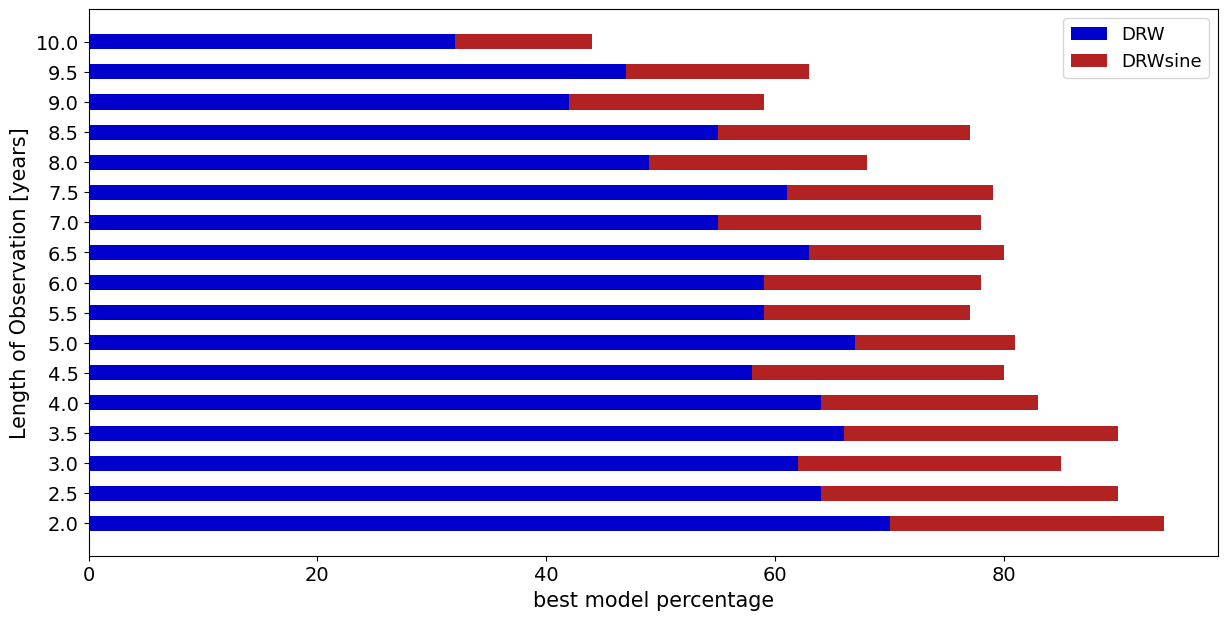

In [95]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

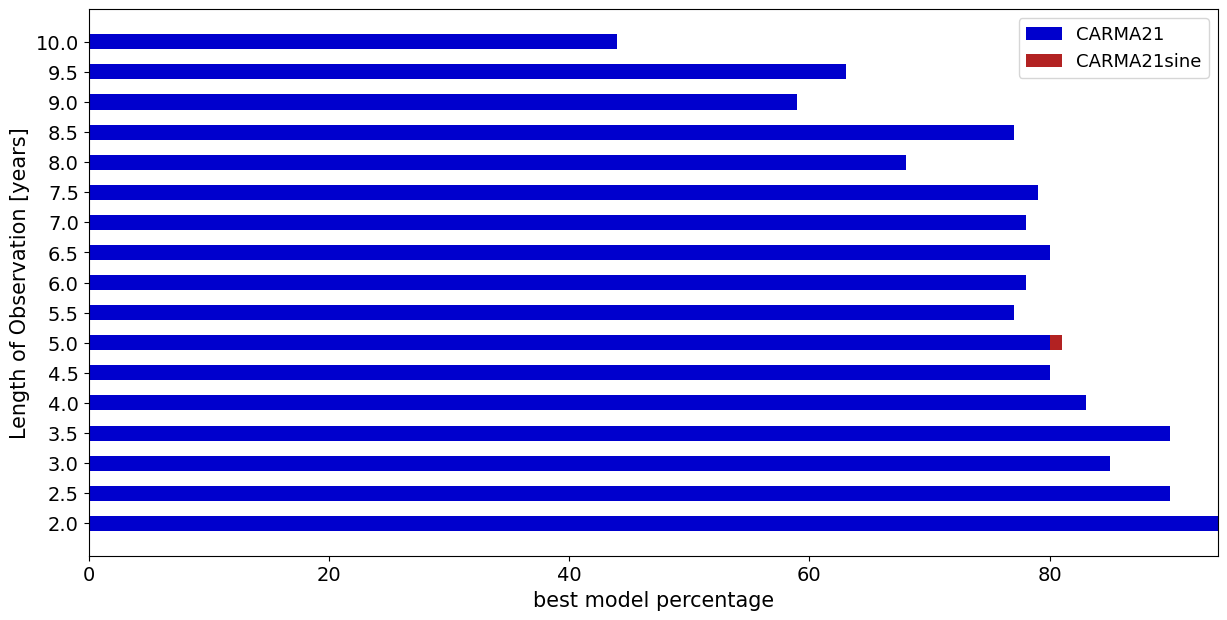

In [96]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        CARMA21_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5
plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['CARMA21', 'CARMA21sine'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

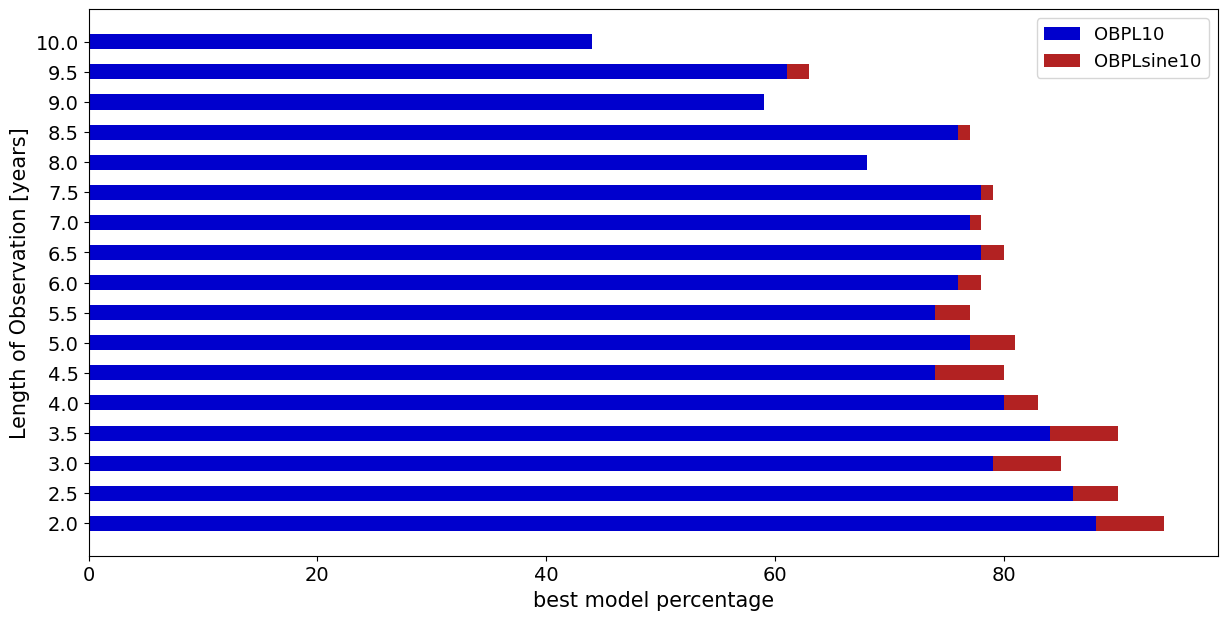

In [97]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('NumofWINDOW')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

NumofWINDOW_array = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        NumofWINDOW_array.append(key[0])
        OBPL10_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine10_value_counts.append(BMCdict_OBPL10[key])

NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5

plt.figure(figsize=[12, 6])
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, color='mediumblue' )
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine10_value_counts, left=OBPL10_value_counts, height=0.5,  color='firebrick')
plt.tight_layout()
plt.legend(['OBPL10', 'OBPLsine10'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [98]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [99]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('NumofWINDOW')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [100]:
NumofWINDOW_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        NumofWINDOW_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])
        
NumofWINDOW_array = np.array(NumofWINDOW_array)*0.5


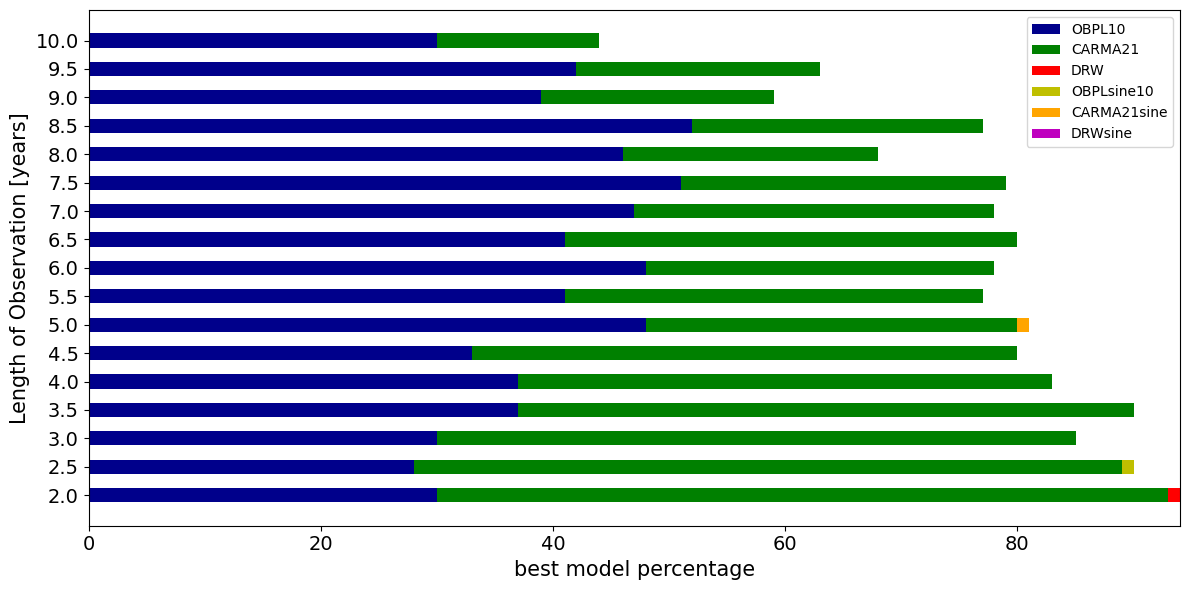

In [101]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='darkblue')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='orange')
plt.barh(np.round(NumofWINDOW_array,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()




## sims : low alpha = -1, high alpha = -3, NumofWINDOWS= 6, WINDOWwidth =[2-11]

#### Processing

In [65]:
DRW_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [66]:
DRW_filenames[-1][74:78], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('1999',
 'helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/1999_DRWsine.json',
 'helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/1999_CARMA21.json',
 'helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/1999_CARMA21sine.json',
 'helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/1999_OBPL10.json',
 'helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/1999_OBPLsine10.json')

In [67]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[74:78]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[74:78]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[74:78]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[74:78]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[74:78]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[74:78]))


In [68]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [69]:
len(common_IDs)

1000

In [70]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/'+str(id)+'_OBPLsine10.json')

In [71]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_3_WINDOWwidth_2_12.csv')

In [72]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,WINDOWwidth,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,24411.0,22633.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,71294.0,14963.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,46272.0,31962.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,49208.0,96074.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,43313.0,77437.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,76998.0,57766.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0,0,0,0,0,0,0,0,0,0
996,1996.0,18471.0,56954.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0,0,0,0,0,0,0,0,0,0
997,1997.0,53663.0,90435.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0,0,0,0,0,0,0,0,0,0
998,1998.0,95358.0,68383.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][74:78])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [74]:
#simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_2_4.csv', index=False)

In [75]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [76]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,WINDOWwidth,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,24411.0,22633.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,454.550816,457.537448,454.361121,451.202169,454.086522,2.538109,0.105208,1.819671,1.207719,None
1,1001.0,71294.0,14963.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,464.655876,467.698023,465.054833,468.804909,465.981480,0.755015,1.731736,0.578514,1.299503,None
2,1002.0,46272.0,31962.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,456.390699,461.989724,456.702203,463.265545,458.318474,0.856215,0.566487,0.731880,0.931005,None
3,1003.0,49208.0,96074.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,476.537743,483.192085,477.935389,484.229229,479.434944,1.685092,0.941390,1.525143,1.423378,None
4,1004.0,43313.0,77437.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,482.840876,487.356687,482.794422,488.895982,484.268802,1.315353,0.888731,1.645943,1.297508,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,76998.0,57766.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,366.751492,380.289411,376.895869,383.782568,379.703933,0.630214,0.344309,0.537579,0.613430,None
996,1996.0,18471.0,56954.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,393.264433,405.163754,400.730566,405.004736,400.937926,0.709317,0.400534,0.637418,1.080443,None
997,1997.0,53663.0,90435.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,372.595963,384.890935,380.544323,388.571622,384.067092,0.607938,0.268185,0.522362,0.802181,None
998,1998.0,95358.0,68383.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,384.638946,395.864889,391.479770,400.801169,395.882702,0.939630,0.311621,0.665667,0.994330,None


In [77]:
import corner
def plot_corner(dictionary, exclude_keys=['log_Z_mean', 'log_Z_uncert']):
    if exclude_keys is None:
        exclude_keys = []

    filtered_data = {key: value for key, value in dictionary.items() if key not in exclude_keys}

    data = np.array([array for array in filtered_data.values()]).T
    
    fig = corner.corner(data, bins=50 ,  labels=list(filtered_data.keys()), show_titles=True, title_kwargs={"fontsize": 12})
    
    plt.show()

In [78]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [79]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10     767
CARMA21    227
DRW          6
Name: count, dtype: int64

In [80]:
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,WINDOWwidth,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,24411.0,22633.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,445.646880,454.550816,457.537448,454.361121,451.202169,454.086522,2.538109,0.105208,1.819671,1.207719
1,1001.0,71294.0,14963.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,466.339869,464.655876,467.698023,465.054833,468.804909,465.981480,0.755015,1.731736,0.578514,1.299503
2,1002.0,46272.0,31962.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,461.424863,456.390699,461.989724,456.702203,463.265545,458.318474,0.856215,0.566487,0.731880,0.931005
3,1003.0,49208.0,96074.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,480.917027,476.537743,483.192085,477.935389,484.229229,479.434944,1.685092,0.941390,1.525143,1.423378
4,1004.0,43313.0,77437.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,486.418209,482.840876,487.356687,482.794422,488.895982,484.268802,1.315353,0.888731,1.645943,1.297508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,76998.0,57766.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,367.807858,366.751492,380.289411,376.895869,383.782568,379.703933,0.630214,0.344309,0.537579,0.613430
996,1996.0,18471.0,56954.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,396.002214,393.264433,405.163754,400.730566,405.004736,400.937926,0.709317,0.400534,0.637418,1.080443
997,1997.0,53663.0,90435.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,375.939366,372.595963,384.890935,380.544323,388.571622,384.067092,0.607938,0.268185,0.522362,0.802181
998,1998.0,95358.0,68383.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,387.637181,384.638946,395.864889,391.479770,400.801169,395.882702,0.939630,0.311621,0.665667,0.994330


In [81]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = -1, -1,-1

In [82]:
simDATA_cropped['DRWsine_bool'] = np.array(simDATA_cropped['DRW_log_Z_mean']<simDATA_cropped['DRWsine_log_Z_mean']).astype('int')
simDATA_cropped['CARMA21sine_bool'] = np.array(simDATA_cropped['CARMA21_log_Z_mean']<simDATA_cropped['CARMA21sine_log_Z_mean']).astype('int')
simDATA_cropped['OBPLsine_bool'] = np.array(simDATA_cropped['OBPL10_log_Z_mean']<simDATA_cropped['OBPLsine10_log_Z_mean']).astype('int')

### plots

In [93]:

def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 0) not in dictionary:
            BMCdict[(key[0], 0)] = 0
        if (key[0], 1) not in dictionary:
            BMCdict[(key[0], 1)] = 0

    return BMCdict

BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby('WINDOWwidth')[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
WINDOWwidth_array = []
DRW_value_counts = []
DRWsine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        WINDOWwidth_array.append(key[0])
        DRW_value_counts.append(BMCdict_DRW[key])
    elif key[1]==1:
        DRWsine_value_counts.append(BMCdict_DRW[key])

WINDOWwidth_array = np.array(WINDOWwidth_array)/30

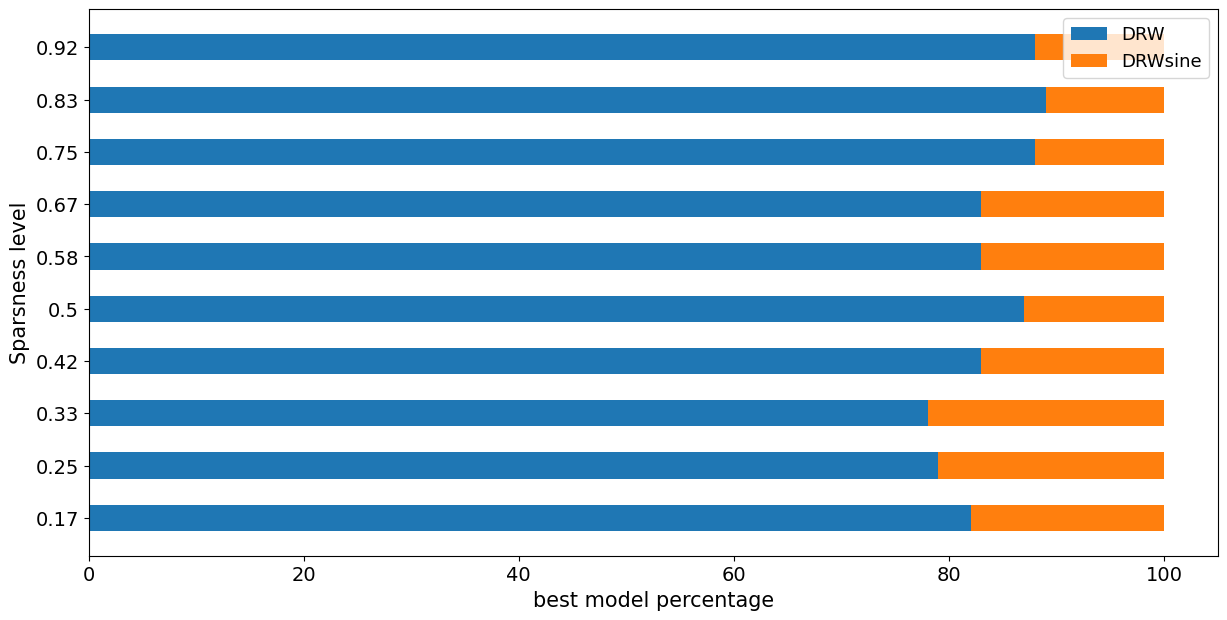

In [94]:

plt.figure(figsize=[12, 6])
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), DRW_value_counts, height=0.5 )
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), DRWsine_value_counts, left=DRW_value_counts, height=0.5)
plt.tight_layout()
plt.legend(['DRW', 'DRWsine'], fontsize=13, loc = 'upper right')
plt.ylabel('Sparsness level', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

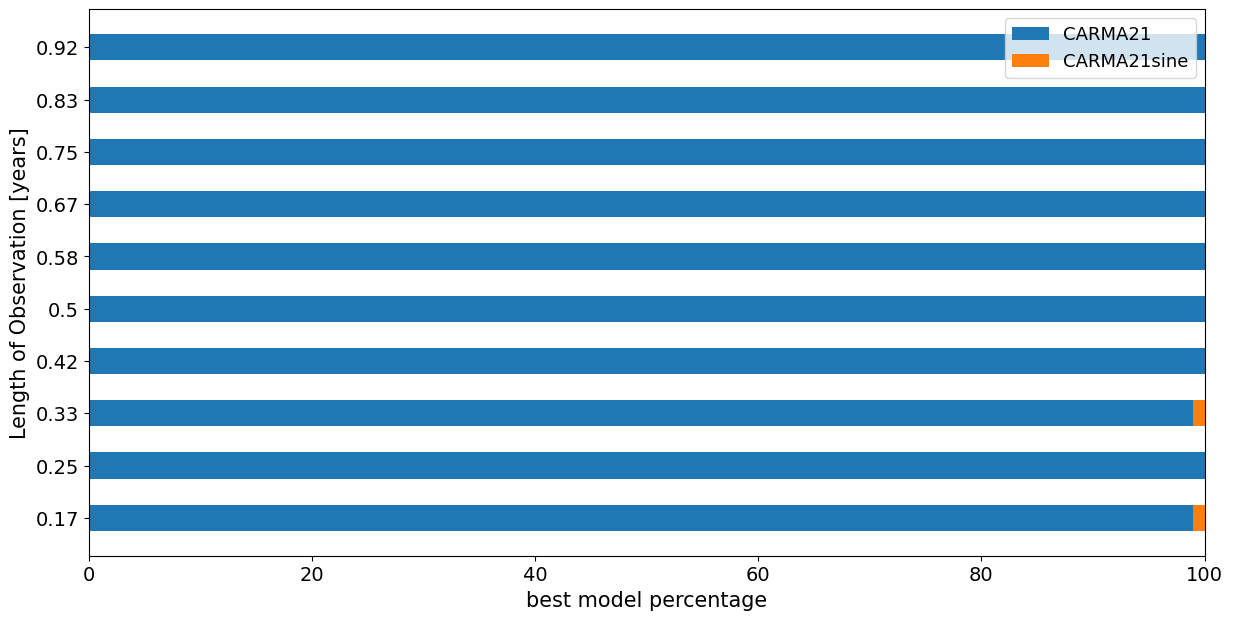

In [95]:
BMCdict_CARMA21 = get_best_model_counts(dictionary = simDATA_cropped.groupby('WINDOWwidth')[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA21 = dict(sorted(BMCdict_CARMA21.items(), key=lambda x: x[0]))

WINDOWwidth_array= []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        WINDOWwidth_array.append(key[0])
        CARMA21_value_counts.append(BMCdict_CARMA21[key])
    elif key[1]==1:
        CARMA21sine_value_counts.append(BMCdict_CARMA21[key])

WINDOWwidth_array = np.array(WINDOWwidth_array)/30
plt.figure(figsize=[12, 6])
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), CARMA21_value_counts, height=0.5)
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), CARMA21sine_value_counts, left=CARMA21_value_counts, height=0.5)
plt.tight_layout()
plt.legend(['CARMA21', 'CARMA21sine'], fontsize=13, loc = 'upper right')
plt.ylabel('Length of Observation [years]', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

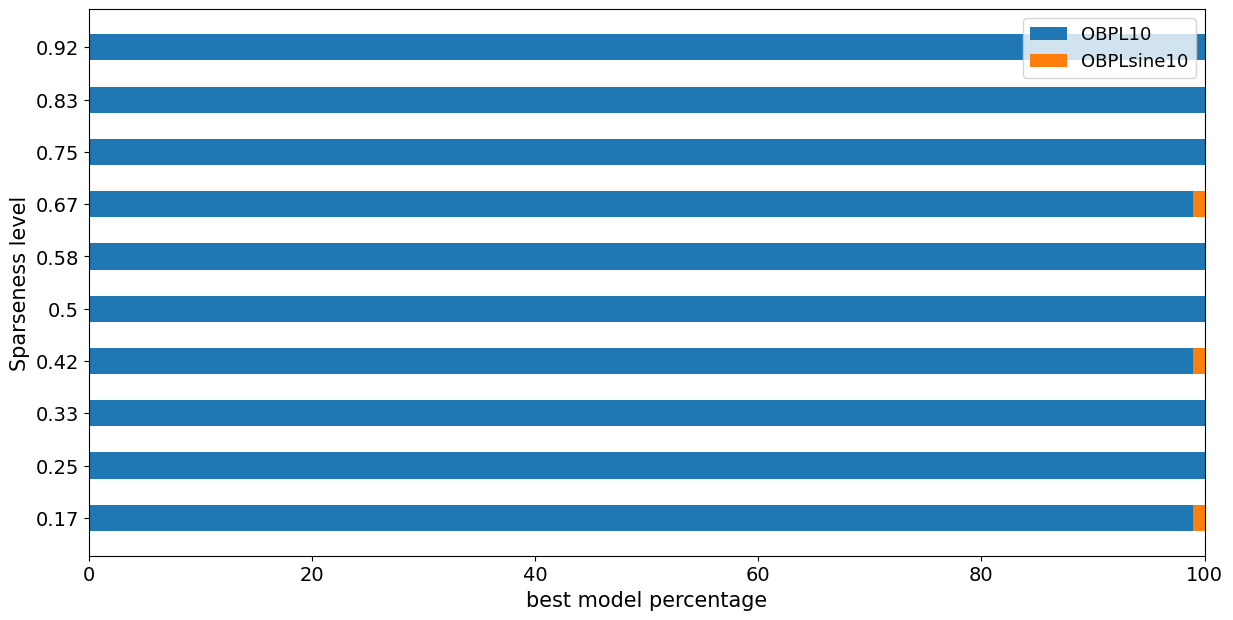

In [96]:
BMCdict_OBPL10 = get_best_model_counts(dictionary = simDATA_cropped.groupby('WINDOWwidth')[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL10 = dict(sorted(BMCdict_OBPL10.items(), key=lambda x: x[0]))

WINDOWwidth_array = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in BMCdict_DRW:
    if key[1]==0:
        WINDOWwidth_array.append(key[0])
        OBPL10_value_counts.append(BMCdict_OBPL10[key])
    elif key[1]==1:
        OBPLsine10_value_counts.append(BMCdict_OBPL10[key])

WINDOWwidth_array = np.array(WINDOWwidth_array)/30

plt.figure(figsize=[12, 6])
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), OBPL10_value_counts, height=0.5 )
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), OBPLsine10_value_counts, left=OBPL10_value_counts, height=0.5)
plt.tight_layout()
plt.legend(['OBPL10', 'OBPLsine10'], fontsize=13, loc = 'upper right')
plt.ylabel('Sparseness level', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [97]:
def get_best_model_counts2(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], 'OBPL10') not in dictionary:
            BMCdict[(key[0], 'OBPL10')] = 0
        if (key[0], 'CARMA21') not in dictionary:
            BMCdict[(key[0], 'CARMA21')] = 0
        if (key[0], 'DRW') not in dictionary:
            BMCdict[(key[0], 'DRW')] = 0
        if (key[0], 'OBPLsine10') not in dictionary:
            BMCdict[(key[0], 'OBPLsine10')] = 0
        if (key[0], 'CARMA21sine') not in dictionary:
            BMCdict[(key[0], 'CARMA21sine')] = 0
        if (key[0], 'DRWsine') not in dictionary:
            BMCdict[(key[0], 'DRWsine')] = 0

    return BMCdict

In [98]:
bestmodel_dict =get_best_model_counts2(simDATA_cropped.groupby('WINDOWwidth')[['bestMODEL']].value_counts().to_dict())
bestmodel_dict = dict(sorted(bestmodel_dict.items(), key=lambda x: x[0]))

In [99]:
WINDOWwidth_array = []
DRW_value_counts = []
DRWsine_value_counts = []
CARMA21_value_counts = []
CARMA21sine_value_counts = []
OBPL10_value_counts = []
OBPLsine10_value_counts = []
for key in bestmodel_dict:
    if key[1]=='OBPL10':
        WINDOWwidth_array.append(key[0])
        OBPL10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='OBPLsine10':
        OBPLsine10_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRWsine':
        DRWsine_value_counts.append(bestmodel_dict[key])
    elif key[1]=='DRW':
        DRW_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21':
        CARMA21_value_counts.append(bestmodel_dict[key])
    elif key[1]=='CARMA21sine':
        CARMA21sine_value_counts.append(bestmodel_dict[key])
        
WINDOWwidth_array = np.array(WINDOWwidth_array)/30


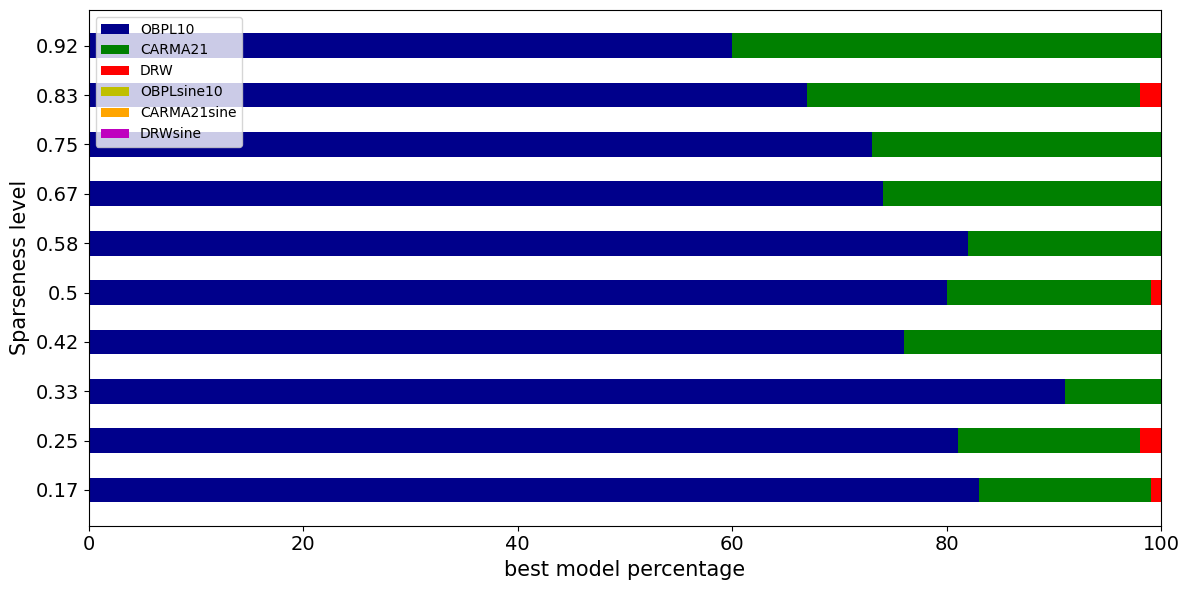

In [100]:
plt.figure(figsize=[12, 6])

plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), OBPL10_value_counts, height=0.5, label='OBPL10', color='darkblue')
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), CARMA21_value_counts, height=0.5, left=OBPL10_value_counts, label='CARMA21', color='g')
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), DRW_value_counts, height=0.5, left=[i+j for i,j in zip(OBPL10_value_counts, CARMA21_value_counts)], label='DRW', color='r')
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), OBPLsine10_value_counts, height=0.5, left=[i+j+k for i,j,k in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts)], label='OBPLsine10', color='y')
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), CARMA21sine_value_counts, height=0.5, left=[i+j+k+m for i,j,k,m in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts)], label='CARMA21sine', color='orange')
plt.barh(np.round(WINDOWwidth_array/12,decimals=2).astype('str'), DRWsine_value_counts, height=0.5, left=[i+j+k+m+n for i,j,k,m,n in zip(OBPL10_value_counts, CARMA21_value_counts, DRW_value_counts, OBPLsine10_value_counts, CARMA21sine_value_counts)], label='DRWsine', color='m')
plt.ylabel('Sparseness level', fontsize=15)
plt.xlabel('best model percentage', fontsize=15)
plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()




## sims : low alpha = -1, high alpha = -3, NumofWINDOWS= 6, A/rms = [0.1, 2], period/OBSlength = [1/8, 1]

#### Processing

In [306]:
DRW_filenames = glob.glob('helios_files/perstudy/*DRW.*')
DRW_filenames.sort()
DRWsine_filenames = glob.glob('helios_files/perstudy/*DRWsine.*')
DRWsine_filenames.sort()
CARMA21_filenames = glob.glob('helios_files/perstudy/*CARMA21.*')
CARMA21_filenames.sort()
CARMA21sine_filenames = glob.glob('helios_files/perstudy/*CARMA21sine.*')
CARMA21sine_filenames.sort()
OBPL10_filenames = glob.glob('helios_files/perstudy/*OBPL10.*')
OBPL10_filenames.sort()
OBPLsine10_filenames = glob.glob('helios_files/perstudy/*OBPLsine10.*')
OBPLsine10_filenames.sort()

In [307]:
DRW_filenames[-1][22:26], DRWsine_filenames[-1], CARMA21_filenames[-1], CARMA21sine_filenames[-1], OBPL10_filenames[-1], OBPLsine10_filenames[-1]

('5799',
 'helios_files/perstudy/5799_DRWsine.json',
 'helios_files/perstudy/5799_CARMA21.json',
 'helios_files/perstudy/5799_CARMA21sine.json',
 'helios_files/perstudy/5799_OBPL10.json',
 'helios_files/perstudy/5799_OBPLsine10.json')

In [308]:
DRW_IDs = []
DRWsine_IDs = []
CARMA21_IDs = []
CARMA21sine_IDs = []
OBPL10_IDs = []
OBPLsine10_IDs = []

for val in DRW_filenames:
    DRW_IDs.append(int(val[22:26]))
for val in DRWsine_filenames:
    DRWsine_IDs.append(int(val[22:26]))
for val in CARMA21_filenames:
    CARMA21_IDs.append(int(val[22:26]))
for val in CARMA21sine_filenames:
    CARMA21sine_IDs.append(int(val[22:26]))
for val in OBPL10_filenames:
    OBPL10_IDs.append(int(val[22:26]))
for val in OBPLsine10_filenames:
    OBPLsine10_IDs.append(int(val[22:26]))


In [309]:
def find_common_elements(arrays):
    if not arrays:
        return []

    # Convert the first array to a set
    common_elements = set(arrays[0])

    # Iterate through the rest of the arrays and find the intersection
    for array in arrays[1:]:
        common_elements.intersection_update(array)

    return list(common_elements)

common_IDs = find_common_elements([DRW_IDs, DRWsine_IDs, CARMA21_IDs, CARMA21sine_IDs, OBPL10_IDs, OBPLsine10_IDs])

In [310]:
len(common_IDs)

4800

In [311]:
DRW_filenames_upd = []
DRWsine_filenames_upd = []
CARMA21_filenames_upd = []
CARMA21sine_filenames_upd = []
OBPL10_filenames_upd = []
OBPLsine10_filenames_upd = []
for id in common_IDs:
    DRW_filenames_upd.append('helios_files/perstudy/'+str(id)+'_DRW.json')
    DRWsine_filenames_upd.append('helios_files/perstudy/'+str(id)+'_DRWsine.json')
    CARMA21_filenames_upd.append('helios_files/perstudy/'+str(id)+'_CARMA21.json')
    CARMA21sine_filenames_upd.append('helios_files/perstudy/'+str(id)+'_CARMA21sine.json')
    OBPL10_filenames_upd.append('helios_files/perstudy/'+str(id)+'_OBPL10.json')
    OBPLsine10_filenames_upd.append('helios_files/perstudy/'+str(id)+'_OBPLsine10.json')

In [312]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_12_period_0.75_6_A1_0.015_0.3.csv')

In [313]:
simDATA[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean','CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' , 'DRW_bf', 'DRWsine_bf', 'OBPL10_bf', 'OBPLsine10_bf'  ]] = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
simDATA

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,period,...,DRW_log_Z_mean,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf
0,1000.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,0,0,0,0,0,0,0,0,0,0
1,1001.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,0,0,0,0,0,0,0,0,0,0
2,1002.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,0,0,0,0,0,0,0,0,0,0
3,1003.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,0,0,0,0,0,0,0,0,0,0
4,1004.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,5795.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,0,0,0,0,0,0,0,0,0,0
4796,5796.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,0,0,0,0,0,0,0,0,0,0
4797,5797.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,0,0,0,0,0,0,0,0,0,0
4798,5798.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,0,0,0,0,0,0,0,0,0,0


In [11]:
DRW_logZ_array = []
DRWsine_logZ_array = []
CARMA21_logZ_array = []
CARMA21sine_logZ_array = []
OBPL10_logZ_array = []
OBPL10sine_logZ_array = []
for i, val in enumerate(common_IDs):
    ID = int(DRW_filenames_upd[i][22:26])
    
    with open(DRW_filenames_upd[i]) as json_file:
        DRW_dict = json.load(json_file)
    with open(DRWsine_filenames_upd[i]) as json_file:
        DRWsine_dict = json.load(json_file)
    with open(CARMA21_filenames_upd[i]) as json_file:
        CARMA21_dict = json.load(json_file)
    with open(CARMA21sine_filenames_upd[i]) as json_file:
        CARMA21sine_dict = json.load(json_file)
    with open(OBPL10_filenames_upd[i]) as json_file:
        OBPL10_dict = json.load(json_file)
    with open(OBPLsine10_filenames_upd[i]) as json_file:
        OBPLsine10_dict = json.load(json_file)
    
    # DRW_logZ_array.append(DRW_dict['log_Z_mean'])
    # DRWsine_logZ_array.append(DRWsine_dict['log_Z_mean'])
    # CARMA21_logZ_array.append(CARMA21_dict['log_Z_mean'])
    # CARMA21sine_logZ_array.append(CARMA21sine_dict['log_Z_mean'])
    # OBPL10_logZ_array.append(OBPL10_dict['log_Z_mean'])
    # OBPL10sine_logZ_array.append(OBPLsine10_dict['log_Z_mean'])
    
    simDATA.loc[simDATA.ID == ID, 'DRW_log_Z_mean'] = DRW_dict['log_Z_mean']
    #simDATA.loc[simDATA.ID == ID, 'DRW_bf'] = np.power(10,np.median(DRW_dict['log_bend_freq']))
    #simDATA.loc[simDATA.ID == ID, 'DRWsine_bf'] = np.power(10, np.median(DRWsine_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'DRWsine_log_Z_mean'] = DRWsine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21_log_Z_mean'] = CARMA21_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'CARMA21sine_log_Z_mean'] = CARMA21sine_dict['log_Z_mean']
    simDATA.loc[simDATA.ID == ID, 'OBPL10_log_Z_mean'] = OBPL10_dict['log_Z_mean']
    #simDATA.loc[simDATA.ID == ID, 'OBPL10_bf'] = np.power(10,np.median(OBPL10_dict['log_bend_freq']))
    simDATA.loc[simDATA.ID == ID, 'OBPLsine10_log_Z_mean'] = OBPLsine10_dict['log_Z_mean']
    #simDATA.loc[simDATA.ID == ID, 'OBPLsine10_bf'] = np.power(10,np.median(OBPLsine10_dict['log_bend_freq']))
    
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [27]:
simDATA.to_csv('helios_files/simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_12_period_0.75_6_A1_0.015_0.3.csv', index=False)


In [321]:
simDATA = pd.read_csv('helios_files/simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_12_period_0.75_6_A1_0.015_0.3.csv')

In [322]:
simDATA_cropped = simDATA.loc[np.array(common_IDs)-1000]

In [323]:
simDATA_cropped[['bestMODEL']] = 'None'
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,period,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,453.378963,457.209034,452.931657,457.692011,453.913833,0,0,0,0,None
1,1001.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,450.725565,454.916072,451.275409,456.109246,452.341126,0,0,0,0,None
2,1002.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,448.150335,452.420643,447.972458,453.816284,449.548047,0,0,0,0,None
3,1003.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,444.831872,449.681858,446.072846,451.616272,447.745630,0,0,0,0,None
4,1004.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,443.735940,446.832378,443.467034,449.372262,445.305151,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,5795.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.727775,482.798205,478.572351,482.554551,480.522127,0,0,0,0,None
4796,5796.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.945316,482.868857,478.298528,482.664674,479.786552,0,0,0,0,None
4797,5797.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.249375,482.962980,478.577857,483.091828,479.989305,0,0,0,0,None
4798,5798.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.503035,482.900122,478.620292,483.307039,480.474783,0,0,0,0,None


In [324]:
for i,row in simDATA_cropped.iterrows():
    model_list = ['DRW', 'DRWsine', 'CARMA21', 'CARMA21sine', 'OBPL10', 'OBPLsine10']
    best_model_arg = np.argmax(np.array(row[['DRW_log_Z_mean', 'DRWsine_log_Z_mean', 'CARMA21_log_Z_mean', 'CARMA21sine_log_Z_mean', 'OBPL10_log_Z_mean', 'OBPLsine10_log_Z_mean' ]]))
    
    simDATA_cropped.loc[simDATA_cropped.ID == row.ID, 'bestMODEL'] = model_list[best_model_arg]
    print(i, end='-->')

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->21-->22-->23-->24-->25-->26-->27-->28-->29-->30-->31-->32-->33-->34-->35-->36-->37-->38-->39-->40-->41-->42-->43-->44-->45-->46-->47-->48-->49-->50-->51-->52-->53-->54-->55-->56-->57-->58-->59-->60-->61-->62-->63-->64-->65-->66-->67-->68-->69-->70-->71-->72-->73-->74-->75-->76-->77-->78-->79-->80-->81-->82-->83-->84-->85-->86-->87-->88-->89-->90-->91-->92-->93-->94-->95-->96-->97-->98-->99-->100-->101-->102-->103-->104-->105-->106-->107-->108-->109-->110-->111-->112-->113-->114-->115-->116-->117-->118-->119-->120-->121-->122-->123-->124-->125-->126-->127-->128-->129-->130-->131-->132-->133-->134-->135-->136-->137-->138-->139-->140-->141-->142-->143-->144-->145-->146-->147-->148-->149-->150-->151-->152-->153-->154-->155-->156-->157-->158-->159-->160-->161-->162-->163-->164-->165-->166-->167-->168-->169-->170-->171-->172-->173-->174-->175-->176-->177-->178-->179-->180-->181-->182-->183-->184-->

In [325]:
simDATA_cropped.bestMODEL.value_counts()

bestMODEL
OBPL10         2286
CARMA21        2184
DRW             239
OBPLsine10       80
CARMA21sine       8
DRWsine           3
Name: count, dtype: int64

In [326]:
simDATA_cropped

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,period,...,DRWsine_log_Z_mean,CARMA21_log_Z_mean,CARMA21sine_log_Z_mean,OBPL10_log_Z_mean,OBPLsine10_log_Z_mean,DRW_bf,DRWsine_bf,OBPL10_bf,OBPLsine10_bf,bestMODEL
0,1000.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,453.378963,457.209034,452.931657,457.692011,453.913833,0,0,0,0,DRW
1,1001.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,450.725565,454.916072,451.275409,456.109246,452.341126,0,0,0,0,OBPL10
2,1002.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,448.150335,452.420643,447.972458,453.816284,449.548047,0,0,0,0,OBPL10
3,1003.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,444.831872,449.681858,446.072846,451.616272,447.745630,0,0,0,0,OBPL10
4,1004.0,90926.0,16330.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,0.375,...,443.735940,446.832378,443.467034,449.372262,445.305151,0,0,0,0,OBPL10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,5795.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.727775,482.798205,478.572351,482.554551,480.522127,0,0,0,0,CARMA21
4796,5796.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.945316,482.868857,478.298528,482.664674,479.786552,0,0,0,0,CARMA21
4797,5797.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.249375,482.962980,478.577857,483.091828,479.989305,0,0,0,0,OBPL10
4798,5798.0,71318.0,94454.0,0.15,0.015,0.00137,-1.0,-3.0,10.0,3.000,...,475.503035,482.900122,478.620292,483.307039,480.474783,0,0,0,0,OBPL10


In [327]:
simDATA_cropped['DRW_DRWsine_bayes'] = np.exp(simDATA_cropped.DRW_log_Z_mean - simDATA_cropped.DRWsine_log_Z_mean)
simDATA_cropped['CARMA21_CARMA21sine_bayes'] = np.exp(simDATA_cropped.CARMA21_log_Z_mean - simDATA_cropped.CARMA21sine_log_Z_mean)
simDATA_cropped['OBPL10_OBPLsine10_bayes'] = np.exp(simDATA_cropped.OBPL10_log_Z_mean - simDATA_cropped.OBPLsine10_log_Z_mean)

In [328]:
simDATA_cropped[['DRWsine_bool', 'CARMA21sine_bool','OBPLsine_bool',]] = 0, 0, 0
bayes_threshold = 2
for i, row in simDATA_cropped.iterrows():
    if np.log10(row.DRW_DRWsine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = 1
    if np.log10(row.DRW_DRWsine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'DRWsine_bool'] = -1
    if np.log10(row.CARMA21_CARMA21sine_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = 1
    if np.log10(row.CARMA21_CARMA21sine_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'CARMA21sine_bool'] = -1
    if np.log10(row.OBPL10_OBPLsine10_bayes)<(-1 * bayes_threshold):
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = 1
    if np.log10(row.OBPL10_OBPLsine10_bayes)>bayes_threshold:
        simDATA_cropped.loc[simDATA_cropped.ID == row.ID,'OBPLsine_bool'] = -1

### plots

In [333]:
def draw_pie(dist, xpos, ypos, size, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()
    #print(pie)
    for i, (r1, r2) in enumerate(zip(pie[:-1], pie[1:])):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()

        xy = np.column_stack([x, y])
        if i==0:
            ax.scatter([xpos], [ypos], marker=xy, s=size, facecolor = 'gray')
        if i==1:
            ax.scatter([xpos], [ypos], marker=xy, s=size, facecolor = 'red')
        if i==2:
            ax.scatter([xpos], [ypos], marker=xy, s=size, facecolor = 'blue')

    #ax.pie(dist, center=(xpos, ypos), radius=size, colors =['r', 'b'])
    return ax


def get_best_model_counts(dictionary):
    
    BMCdict = dictionary.copy()
    for key in dictionary:

        if (key[0], key[1], 0) not in dictionary:
            BMCdict[(key[0], key[1], 0)] = 0
        if (key[0], key[1], 1) not in dictionary:
            BMCdict[(key[0], key[1], 1)] = 0
        if (key[0], key[1], -1) not in dictionary:
            BMCdict[(key[0], key[1], -1)] = 0

    return BMCdict

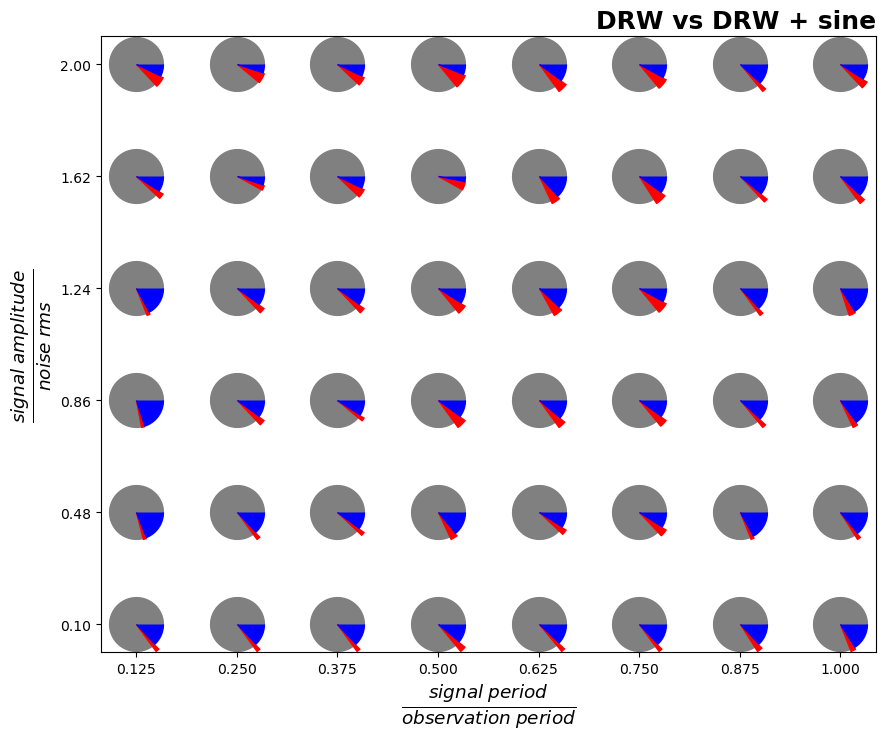

In [342]:


BMCdict_DRW = get_best_model_counts(dictionary = simDATA_cropped.groupby(['period', 'A1'])[['DRWsine_bool']].value_counts().to_dict())
BMCdict_DRW = dict(sorted(BMCdict_DRW.items(), key=lambda x: x[0]))
# period_array = []
# A1_array = []
DRW_value_counts = []
DRWsine_value_counts = []
#FNR_dict = {}
DRW_value_count_dict = {}
for key in BMCdict_DRW:
    if key[2]==0:
        # period_array.append(key[0])
        # A1_array.append(key[1])
        #DRW_value_counts.append(BMCdict_DRW[key])
        #FNR_dict[(key[0], key[1])] = BMCdict_DRW[(key[0], key[1], 0)]/(BMCdict_DRW[(key[0], key[1], 0)] + BMCdict_DRW[(key[0], key[1], 1)] )
        DRW_value_count_dict[(key[0], key[1])] = (BMCdict_DRW[(key[0], key[1], 0)], BMCdict_DRW[(key[0], key[1], 1)], BMCdict_DRW[(key[0], key[1], -1)])
        # print(key[0]/3, key[1]/0.15, '-->', DRW_value_count_dict[(key[0], key[1])])

    #elif key[2]==1:
        #DRWsine_value_counts.append(BMCdict_DRW[key])
        

fig, ax = plt.subplots(1,1, figsize=[10,8])
for key in DRW_value_count_dict:
    
    #ax.pie(DRW_value_count_dict[key], center=(key[0], key[1]) radius = 0.0, colors=['tab:blue', 'tab:orange'])
    draw_pie(DRW_value_count_dict[key], key[0]/3, key[1]/0.15, size = 1500, ax=ax)
    
ax.set_xticks(np.linspace(1/8, 1, 8))
ax.set_yticks(np.linspace(0.1, 2, 6))

ax.set_ylabel(r'$\frac{signal\;amplitude}{noise\;rms}$', fontsize = 19)
ax.set_xlabel(r'$\frac{signal\;period}{observation\;period}$', fontsize = 19)
plt.title('DRW vs DRW + sine', loc = 'right', fontsize = 18, weight = 'bold')
plt.show()

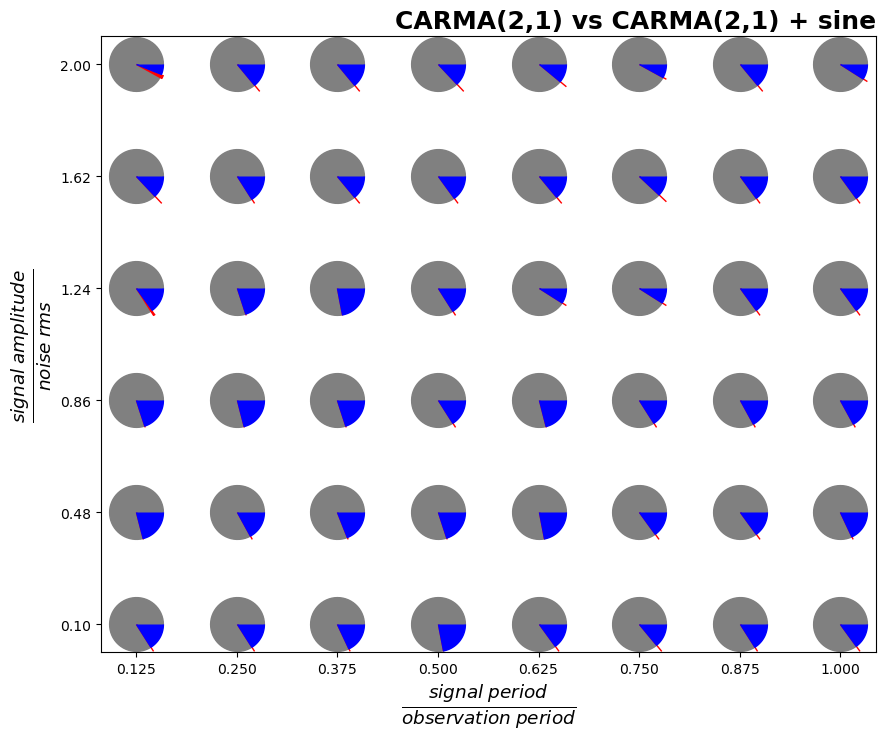

In [343]:

BMCdict_CARMA = get_best_model_counts(dictionary = simDATA_cropped.groupby(['period', 'A1'])[['CARMA21sine_bool']].value_counts().to_dict())
BMCdict_CARMA = dict(sorted(BMCdict_CARMA.items(), key=lambda x: x[0]))
# period_array = []
# A1_array = []
CARMA_value_counts = []
CARMAsine_value_counts = []
#FNR_dict = {}
CARMA_value_count_dict = {}
for key in BMCdict_CARMA:
    if key[2]==0:
        # period_array.append(key[0])
        # A1_array.append(key[1])
        #DRW_value_counts.append(BMCdict_DRW[key])
        #FNR_dict[(key[0], key[1])] = BMCdict_DRW[(key[0], key[1], 0)]/(BMCdict_DRW[(key[0], key[1], 0)] + BMCdict_DRW[(key[0], key[1], 1)] )
        CARMA_value_count_dict[(key[0], key[1])] = (BMCdict_CARMA[(key[0], key[1], 0)], BMCdict_CARMA[(key[0], key[1], 1)], BMCdict_CARMA[(key[0], key[1], -1)])
    #elif key[2]==1:
        #DRWsine_value_counts.append(BMCdict_DRW[key])
        
fig, ax = plt.subplots(1,1, figsize=[10,8])
for key in CARMA_value_count_dict:
    
    #ax.pie(DRW_value_count_dict[key], center=(key[0], key[1]) radius = 0.0, colors=['tab:blue', 'tab:orange'])
    draw_pie(CARMA_value_count_dict[key], key[0]/3, key[1]/0.15, size = 1500, ax=ax)
    
ax.set_xticks(np.linspace(1/8, 1, 8))
ax.set_yticks(np.linspace(0.1, 2, 6))

ax.set_ylabel(r'$\frac{signal\;amplitude}{noise\;rms}$', fontsize = 19)
ax.set_xlabel(r'$\frac{signal\;period}{observation\;period}$', fontsize = 19)
plt.title('CARMA(2,1) vs CARMA(2,1) + sine', loc = 'right', fontsize = 18, weight = 'bold')

plt.show()

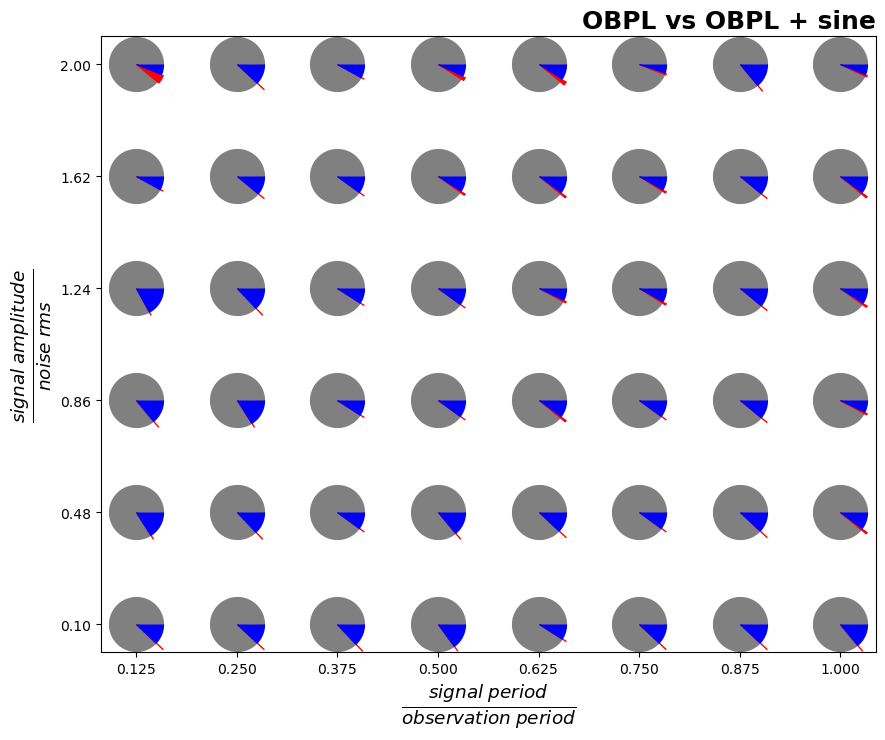

In [344]:

BMCdict_OBPL = get_best_model_counts(dictionary = simDATA_cropped.groupby(['period', 'A1'])[['OBPLsine_bool']].value_counts().to_dict())
BMCdict_OBPL = dict(sorted(BMCdict_OBPL.items(), key=lambda x: x[0]))
# period_array = []
# A1_array = []
OBPL_value_counts = []
OBPLsine_value_counts = []
#FNR_dict = {}
OBPL_value_count_dict = {}
for key in BMCdict_OBPL:
    if key[2]==0:
        # period_array.append(key[0])
        # A1_array.append(key[1])
        #DRW_value_counts.append(BMCdict_DRW[key])
        #FNR_dict[(key[0], key[1])] = BMCdict_DRW[(key[0], key[1], 0)]/(BMCdict_DRW[(key[0], key[1], 0)] + BMCdict_DRW[(key[0], key[1], 1)] )
        OBPL_value_count_dict[(key[0], key[1])] = (BMCdict_OBPL[(key[0], key[1], 0)], BMCdict_OBPL[(key[0], key[1], 1)], BMCdict_OBPL[(key[0], key[1], -1)])
    #elif key[2]==1:
        #DRWsine_value_counts.append(BMCdict_DRW[key])
        
fig, ax = plt.subplots(1,1, figsize=[10,8])
for key in OBPL_value_count_dict:
    
    #ax.pie(DRW_value_count_dict[key], center=(key[0], key[1]) radius = 0.0, colors=['tab:blue', 'tab:orange'])
    draw_pie(OBPL_value_count_dict[key], key[0]/3, key[1]/0.15, size = 1500, ax=ax)
    
ax.set_xticks(np.linspace(1/8, 1, 8))
ax.set_yticks(np.linspace(0.1, 2, 6))

ax.set_ylabel(r'$\frac{signal\;amplitude}{noise\;rms}$', fontsize = 19)
ax.set_xlabel(r'$\frac{signal\;period}{observation\;period}$', fontsize = 19)
plt.title('OBPL vs OBPL + sine', loc = 'right', fontsize = 18, weight = 'bold')

plt.show()